# Advanced House Price Prediction


The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead



## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [2]:
train_house=pd.read_csv('../../data/house_pred_train.csv')

In [3]:
train_house.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#id column is not required.
train_house.drop('Id',axis=1,inplace=True)

In [5]:
# split numerical features
num_features=[feature for feature in train_house.columns if train_house[feature].dtype != 'O']

In [6]:
print('Total no.of numerical features : {}'.format(len(num_features)))

Total no.of numerical features : 37


In [7]:
# Split Temporal features (Date and time)
temporal_featutes=[temp_feature for temp_feature in num_features if 'Year' in temp_feature or 'Yr' in temp_feature]

In [8]:
temporal_featutes

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
num_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

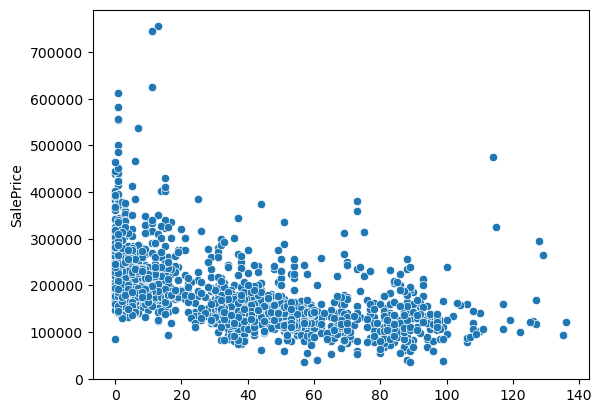

In [10]:
sns.scatterplot(train_house['YrSold']-train_house['YearBuilt'],train_house['SalePrice'])

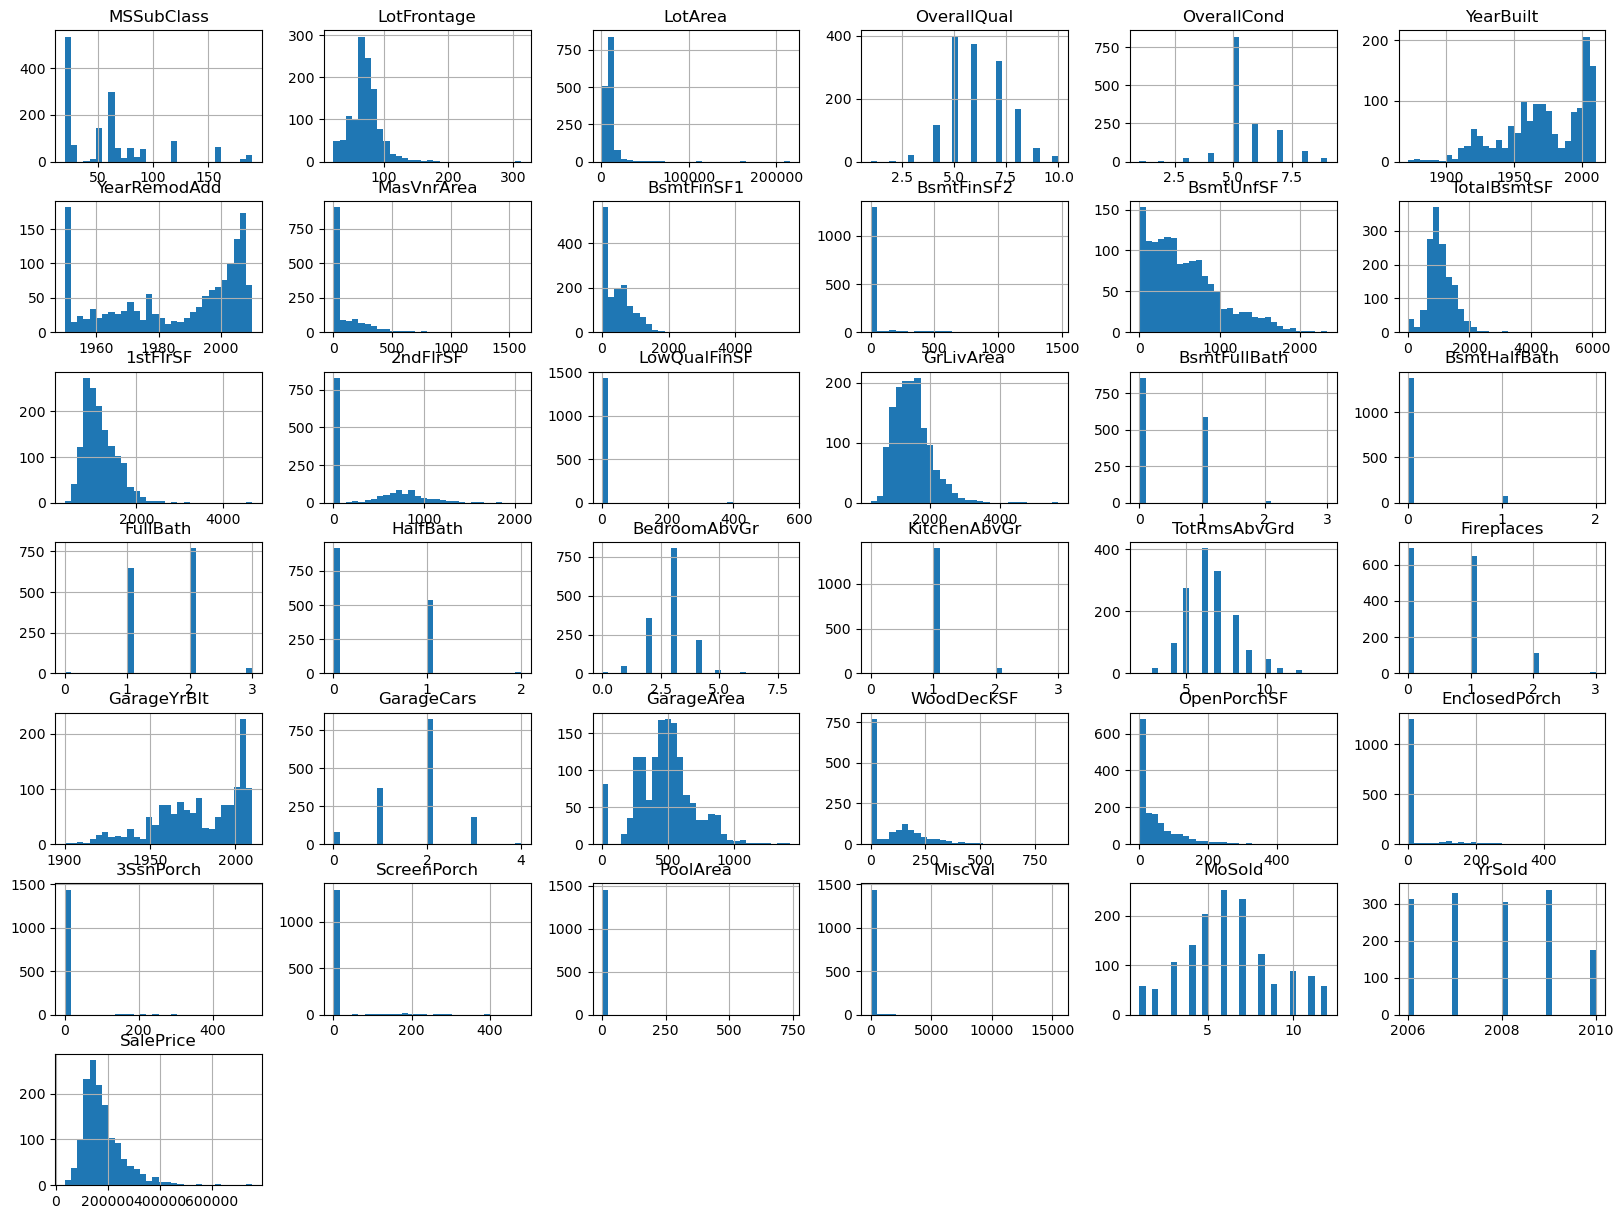

In [11]:
train_house.hist(bins=30,figsize=(20,15))
plt.show()

In [12]:
continuous_features = [cont_feature for cont_feature in num_features if cont_feature not in temporal_featutes]

In [13]:
print("Lenght of continuour feature : {} ".format(len(continuous_features)))

Lenght of continuour feature : 33 


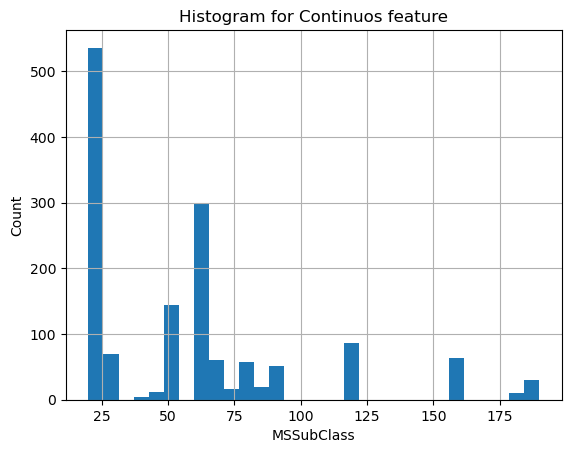

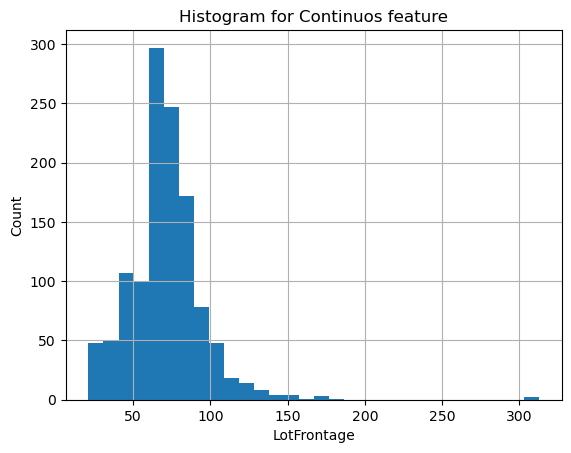

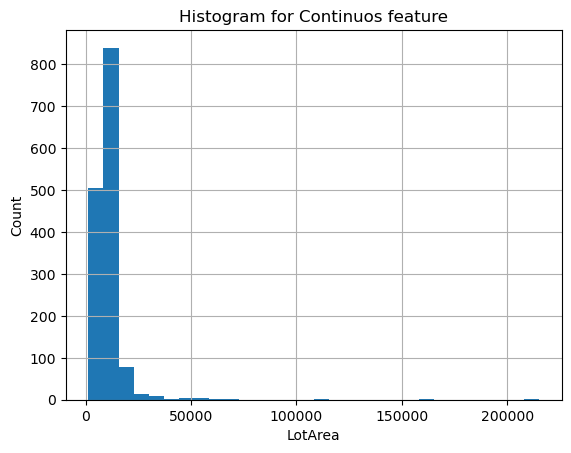

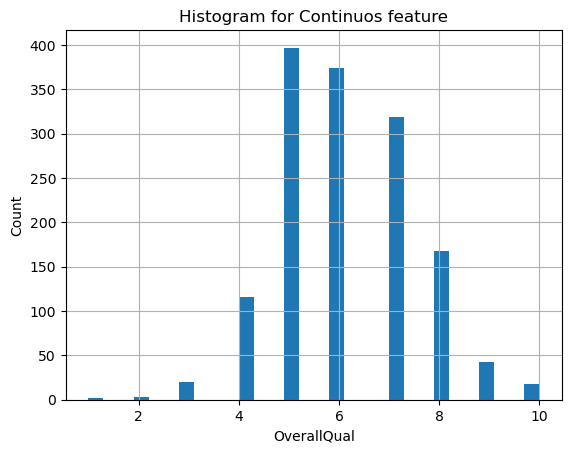

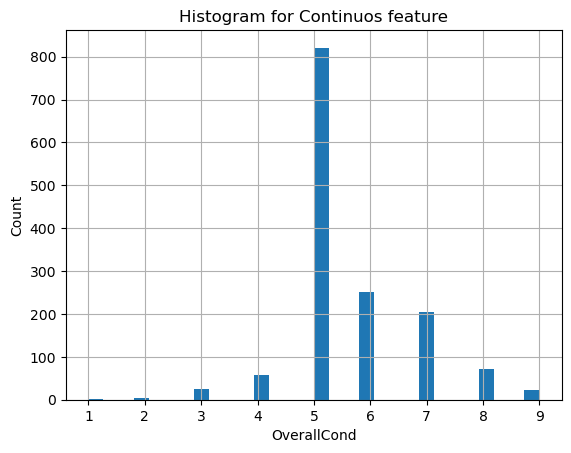

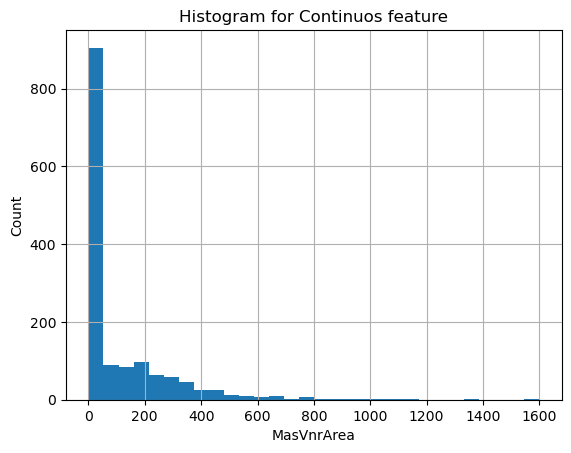

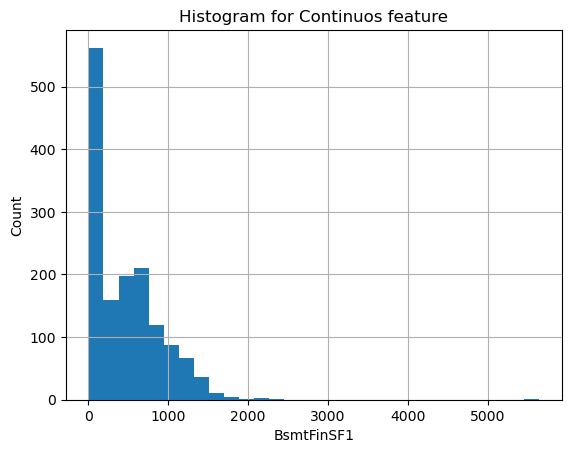

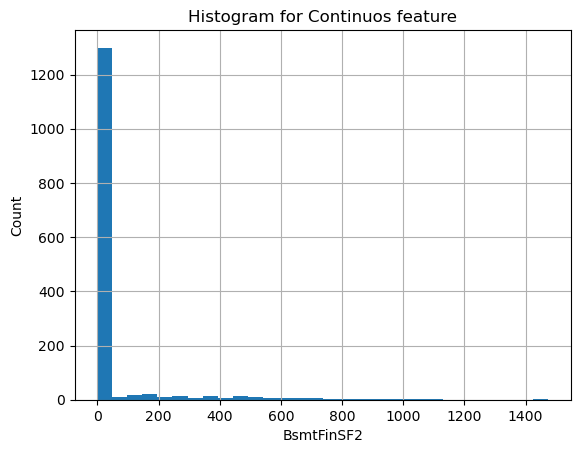

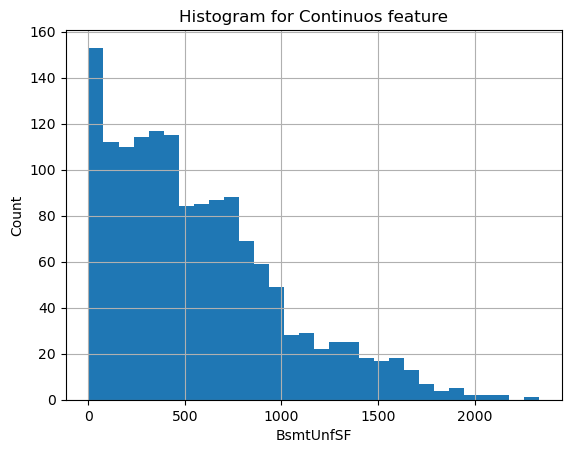

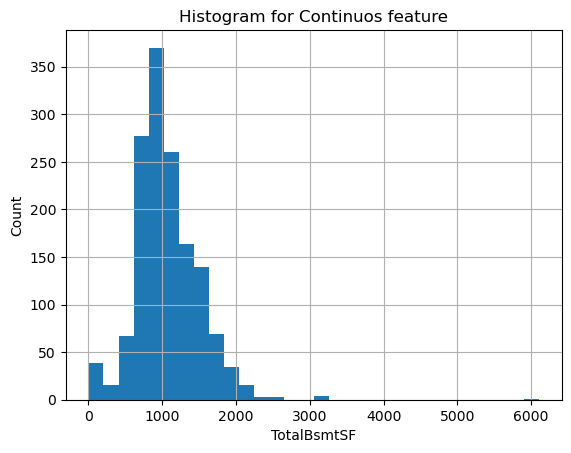

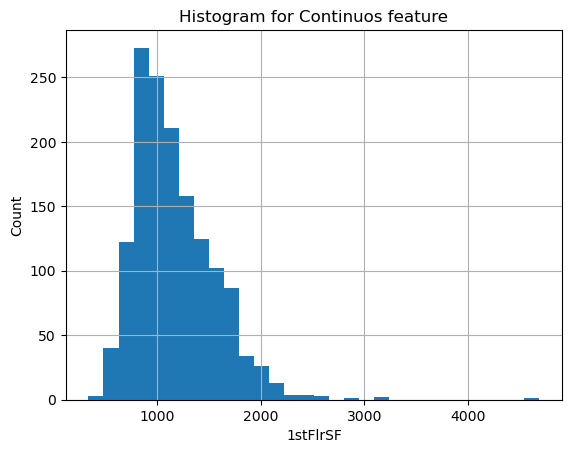

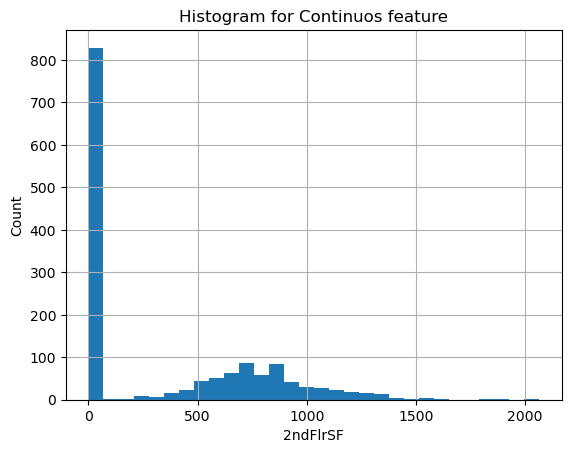

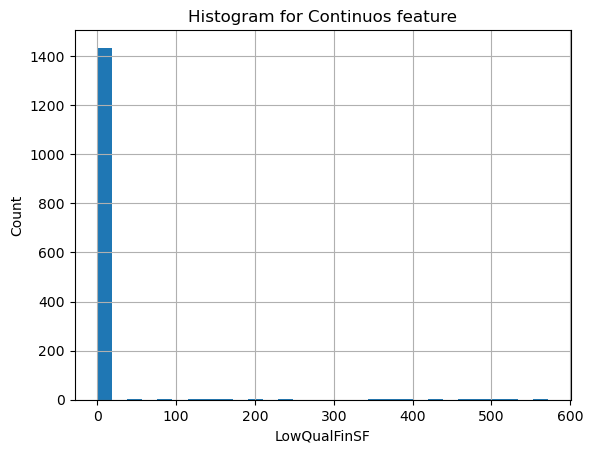

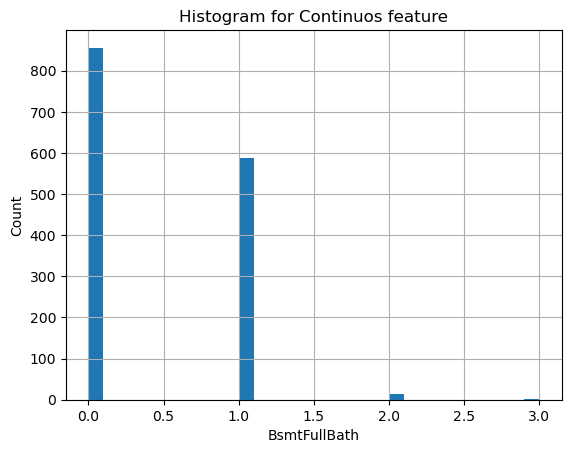

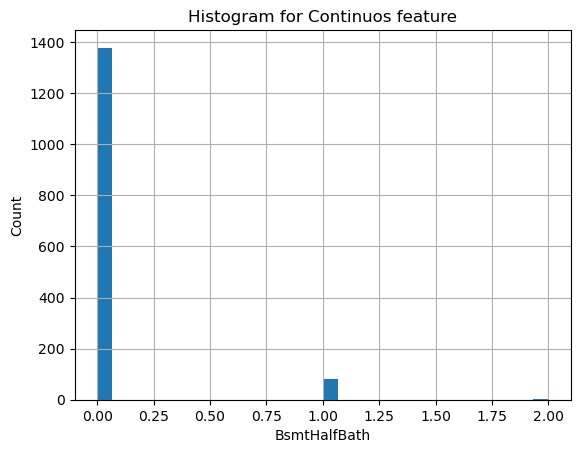

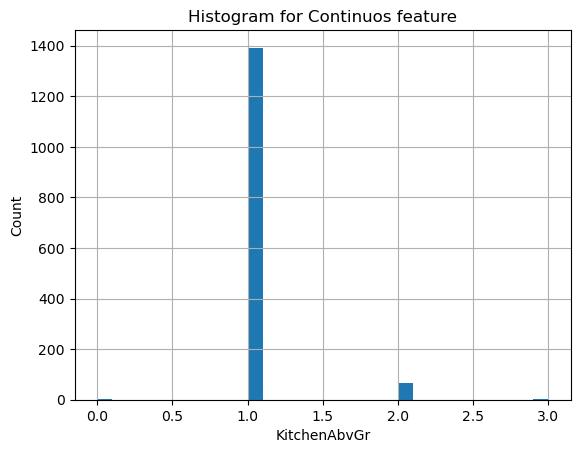

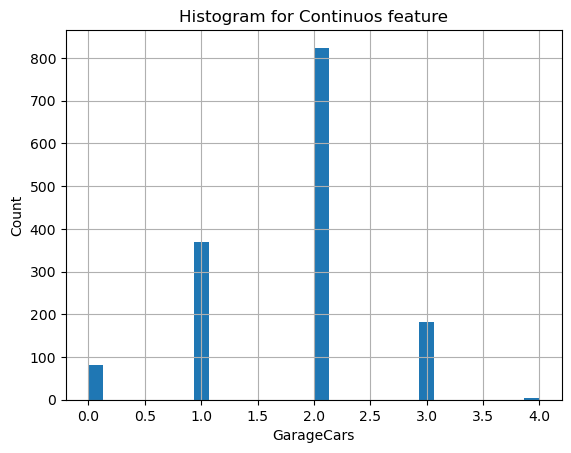

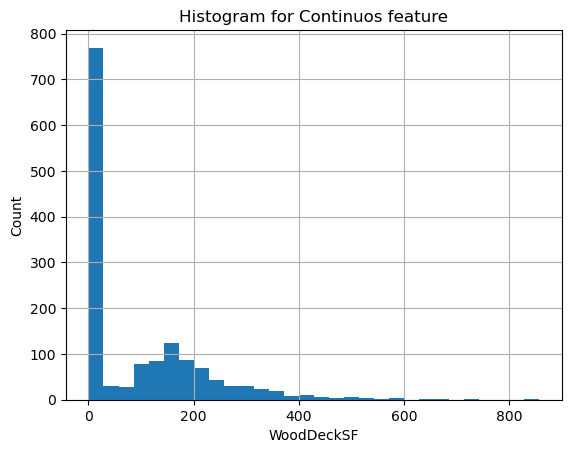

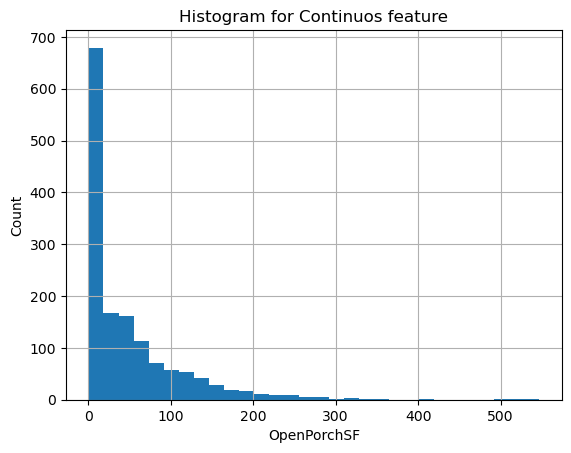

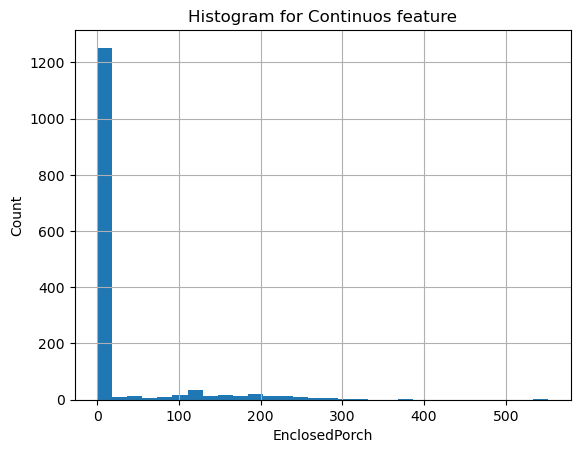

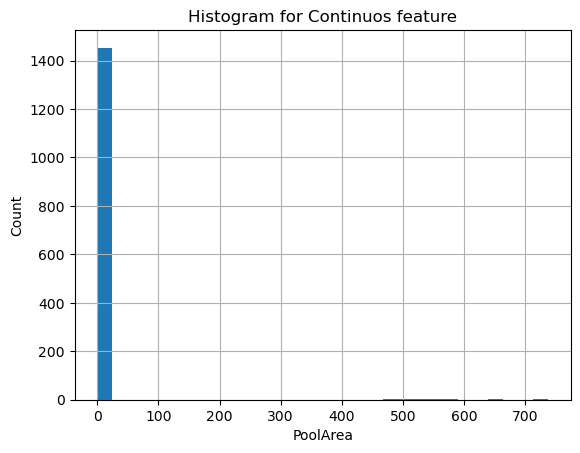

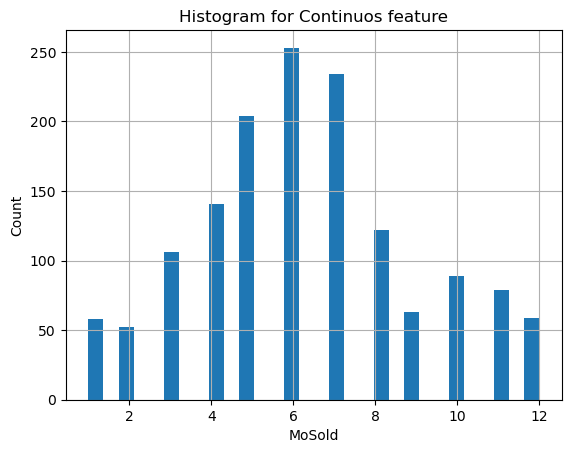

In [14]:
for feature in continuous_features:
    train_house[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Histogram for Continuos feature')
    plt.show()

In [15]:
categorical_features=[feature for feature in train_house.columns if train_house[feature].dtype == 'O']

In [16]:
for cat_fet in categorical_features:
    print('Feature : {} count : {}'.format(cat_fet,train_house[cat_fet].nunique()))

Feature : MSZoning count : 5
Feature : Street count : 2
Feature : Alley count : 2
Feature : LotShape count : 4
Feature : LandContour count : 4
Feature : Utilities count : 2
Feature : LotConfig count : 5
Feature : LandSlope count : 3
Feature : Neighborhood count : 25
Feature : Condition1 count : 9
Feature : Condition2 count : 8
Feature : BldgType count : 5
Feature : HouseStyle count : 8
Feature : RoofStyle count : 6
Feature : RoofMatl count : 8
Feature : Exterior1st count : 15
Feature : Exterior2nd count : 16
Feature : MasVnrType count : 4
Feature : ExterQual count : 4
Feature : ExterCond count : 5
Feature : Foundation count : 6
Feature : BsmtQual count : 4
Feature : BsmtCond count : 4
Feature : BsmtExposure count : 4
Feature : BsmtFinType1 count : 6
Feature : BsmtFinType2 count : 6
Feature : Heating count : 6
Feature : HeatingQC count : 5
Feature : CentralAir count : 2
Feature : Electrical count : 5
Feature : KitchenQual count : 4
Feature : Functional count : 7
Feature : FireplaceQu co

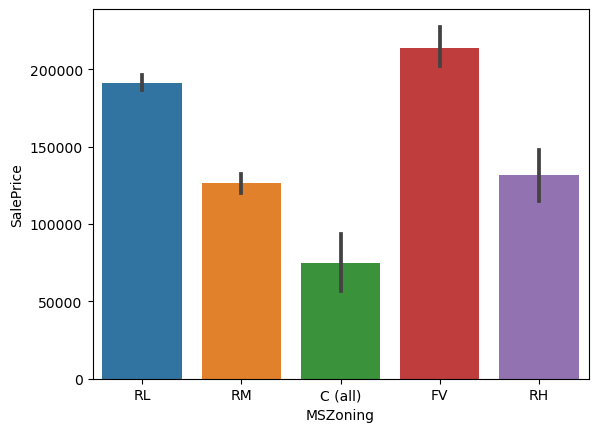

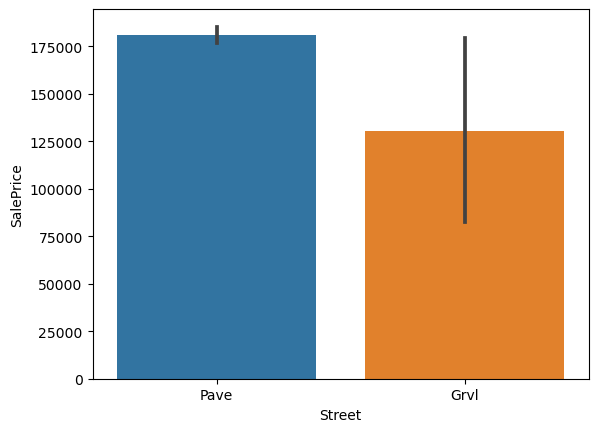

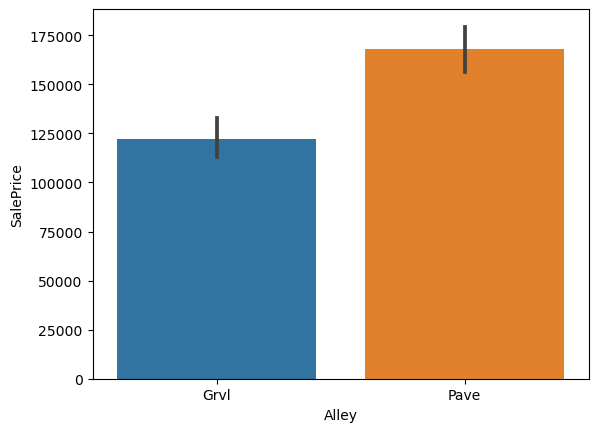

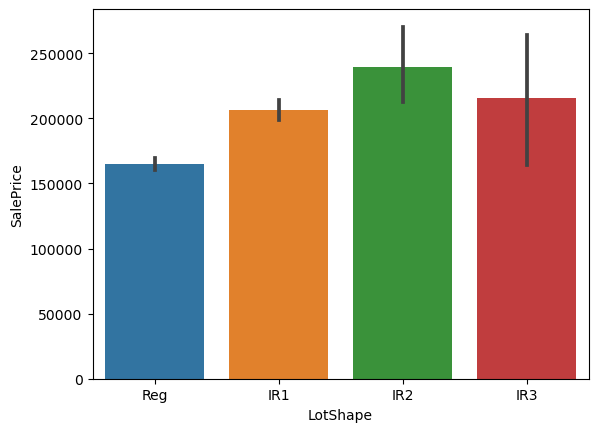

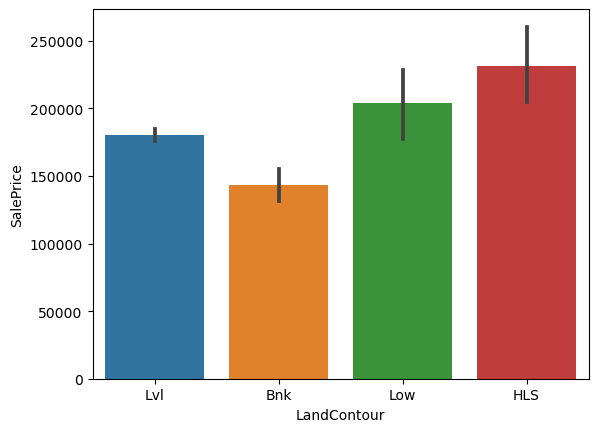

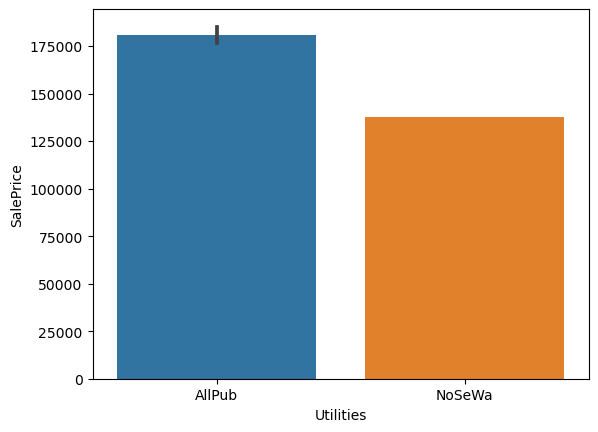

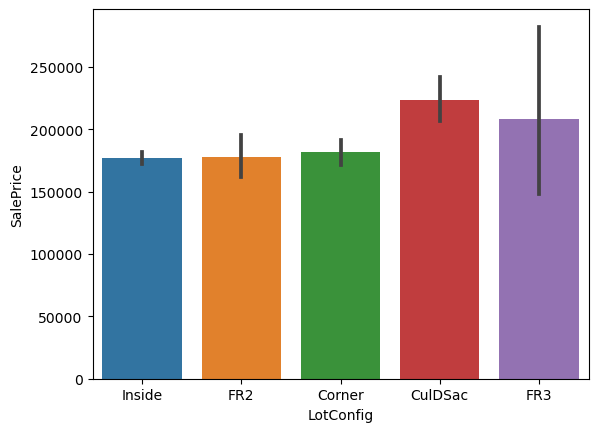

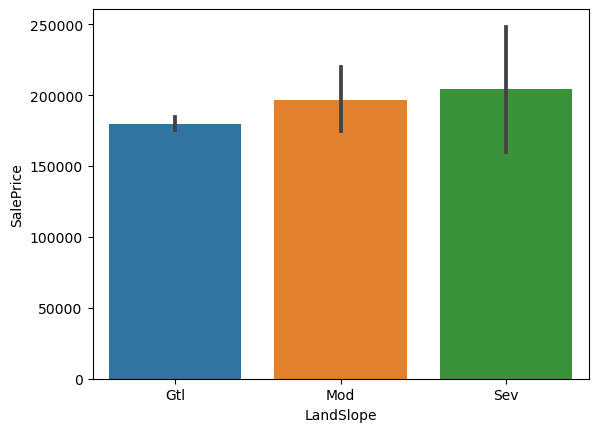

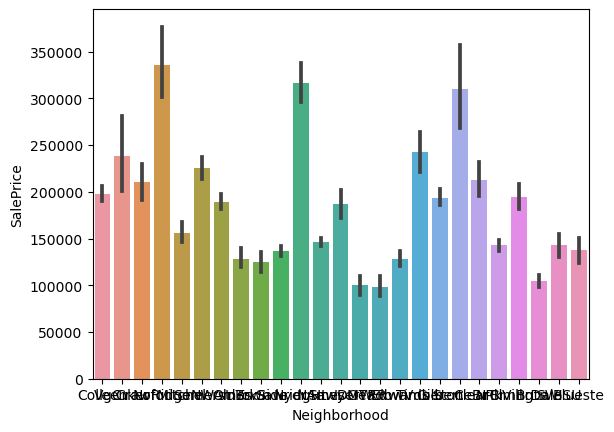

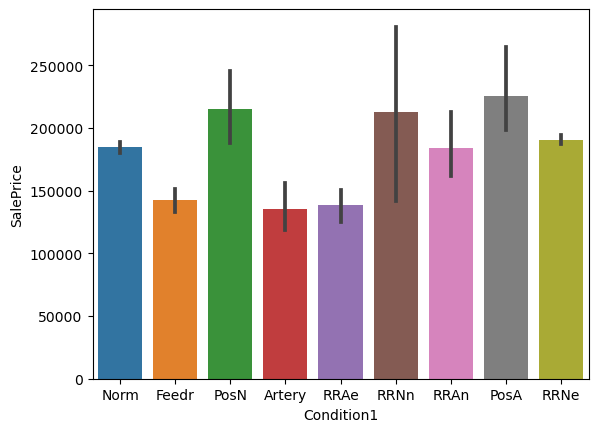

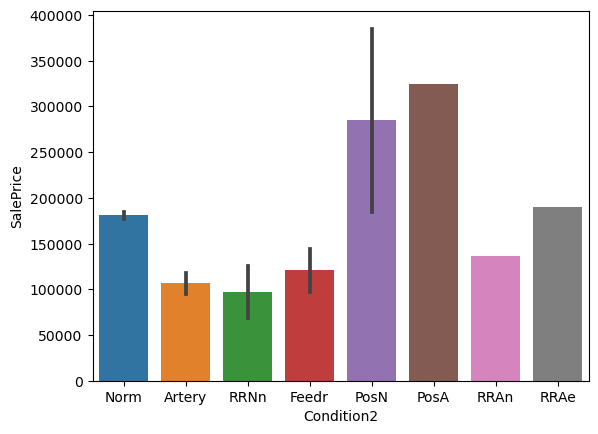

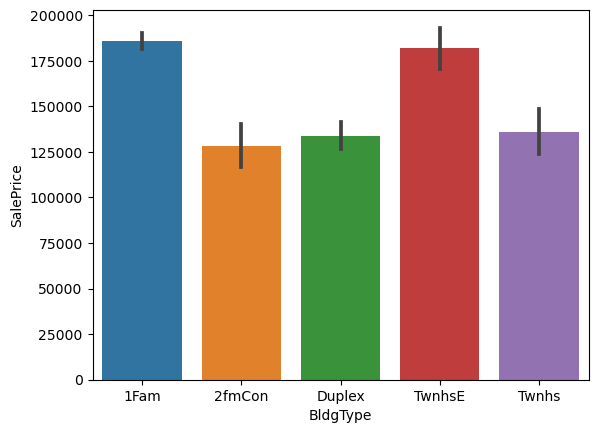

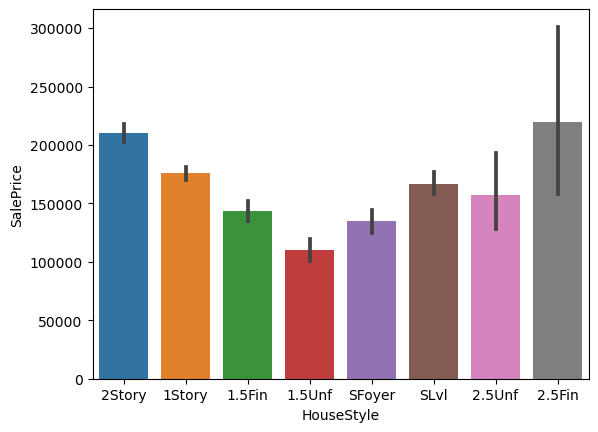

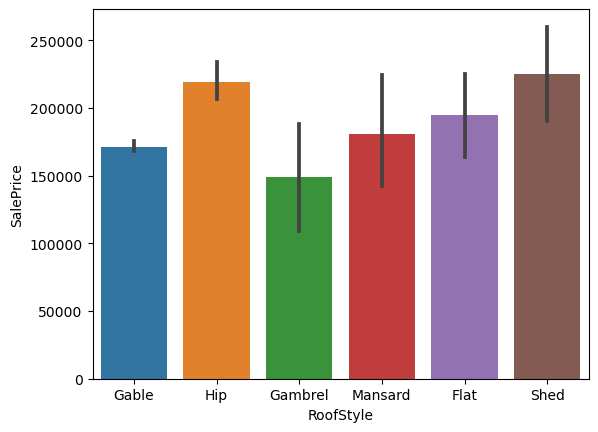

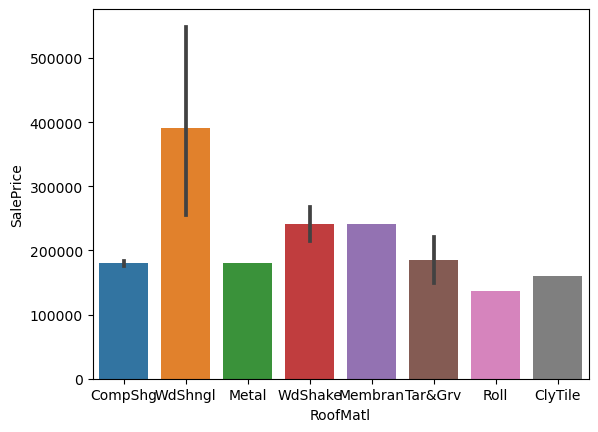

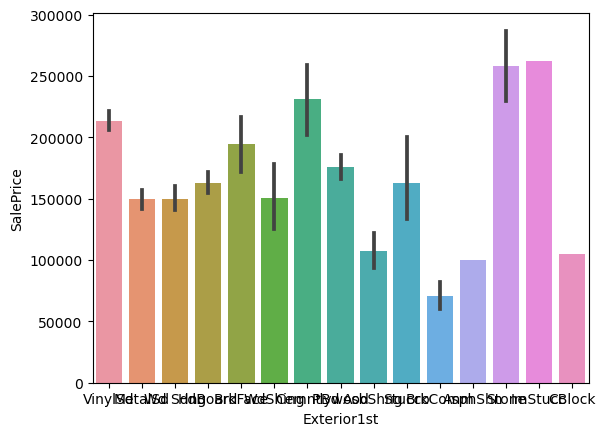

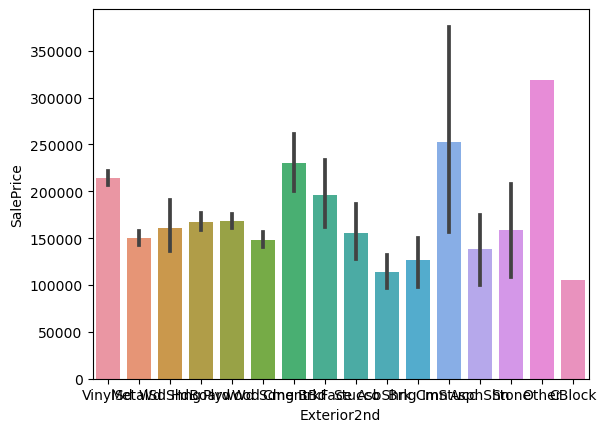

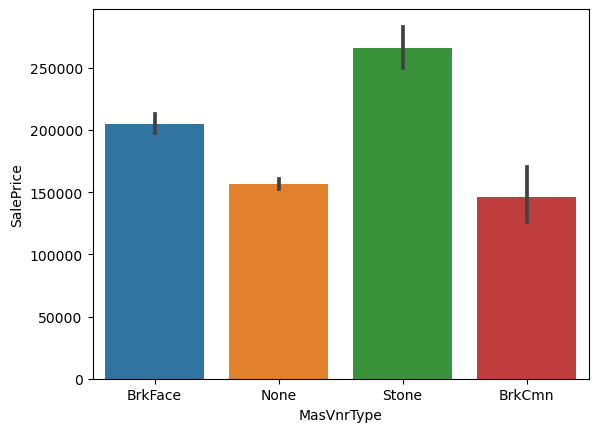

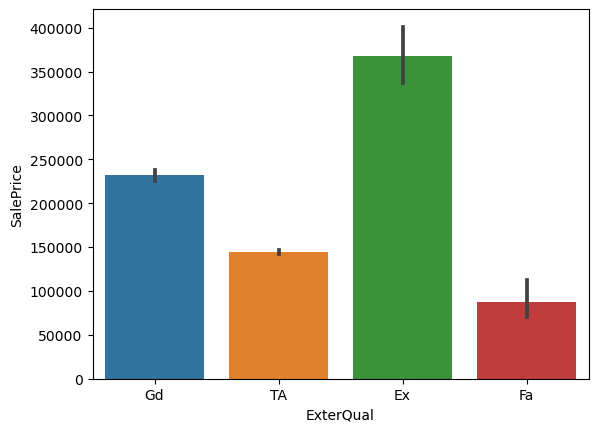

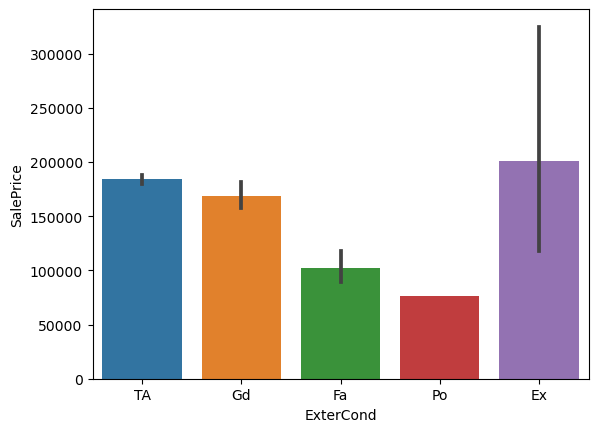

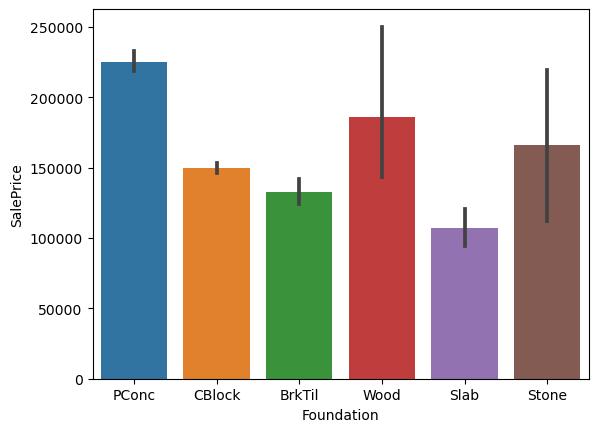

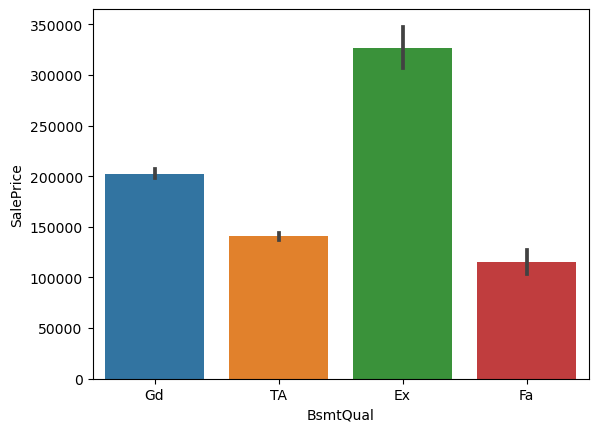

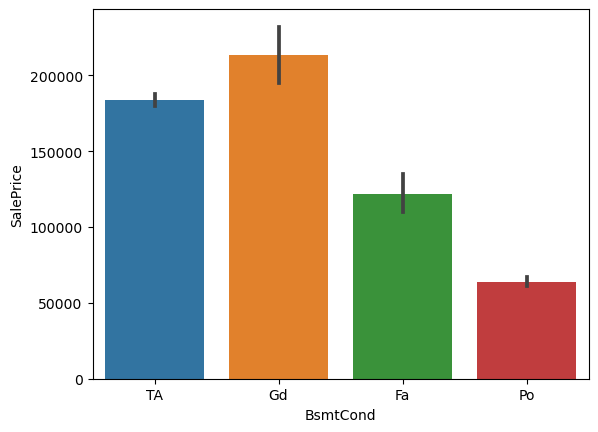

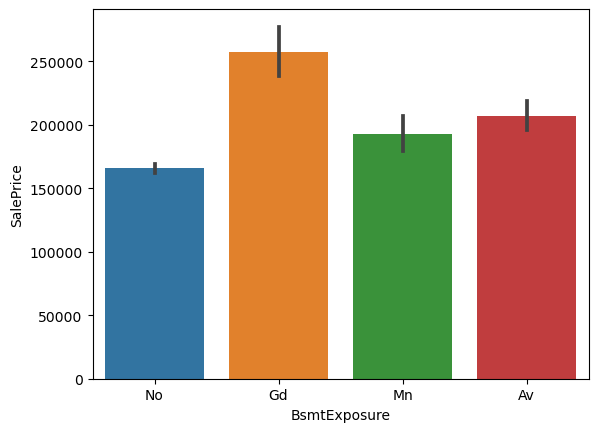

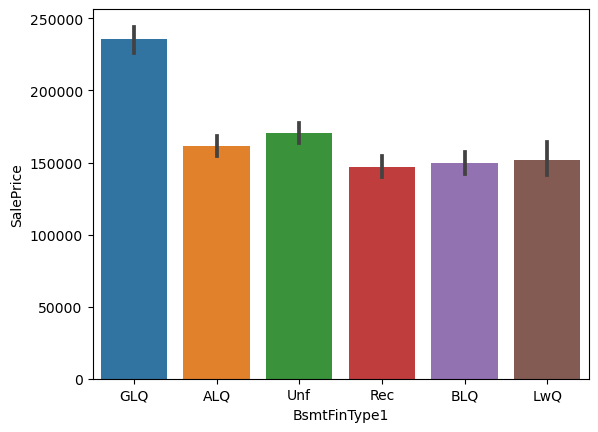

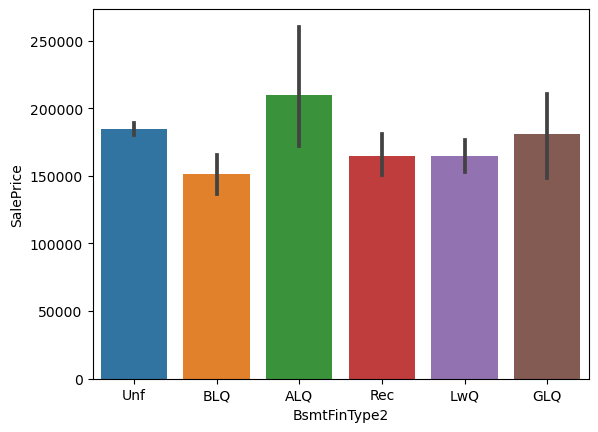

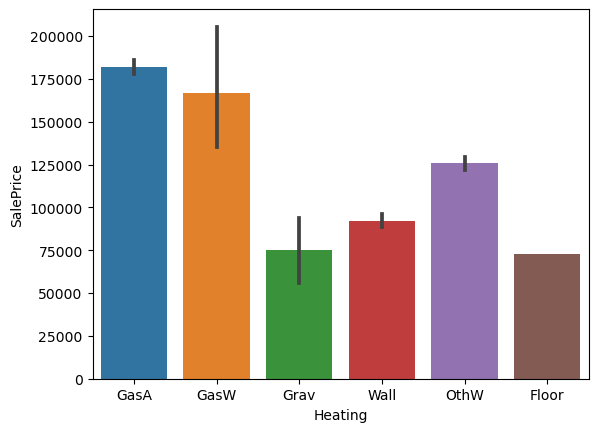

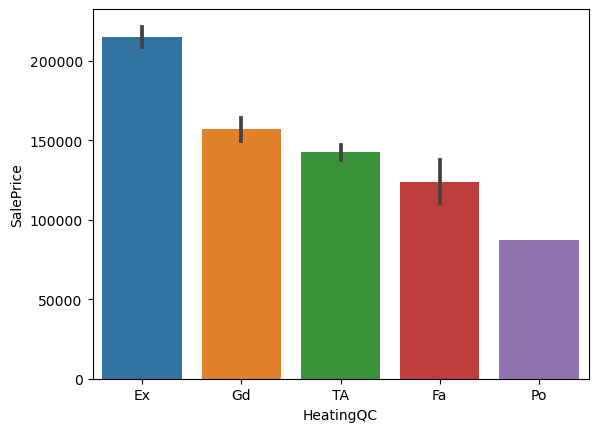

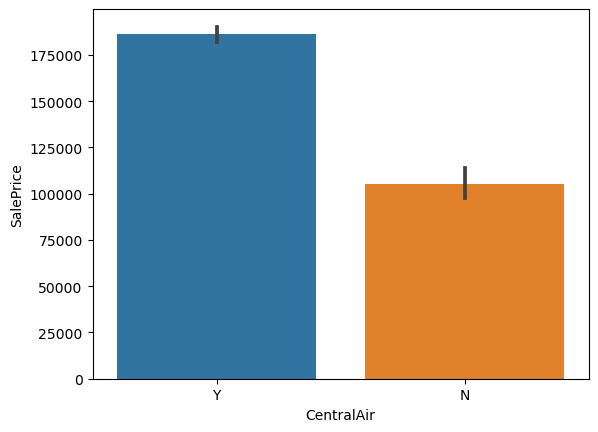

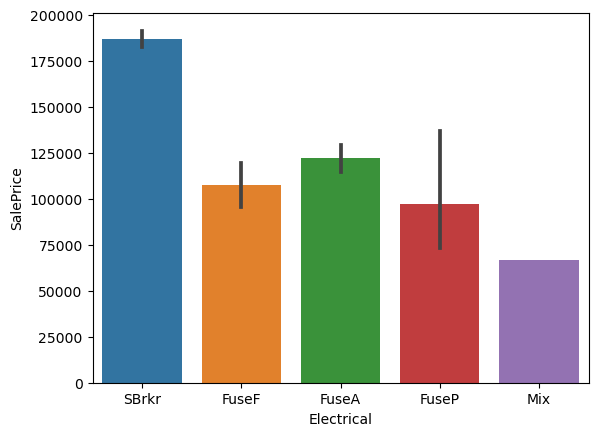

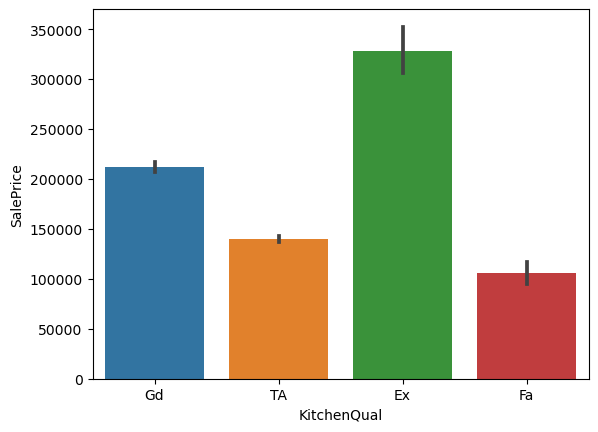

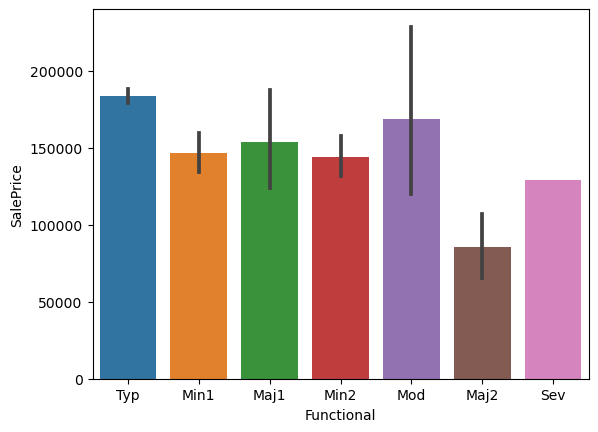

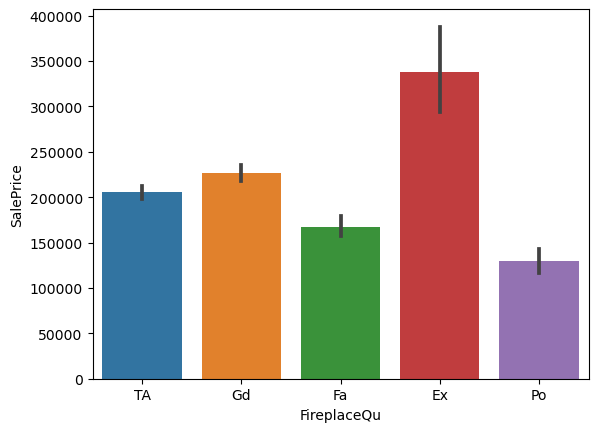

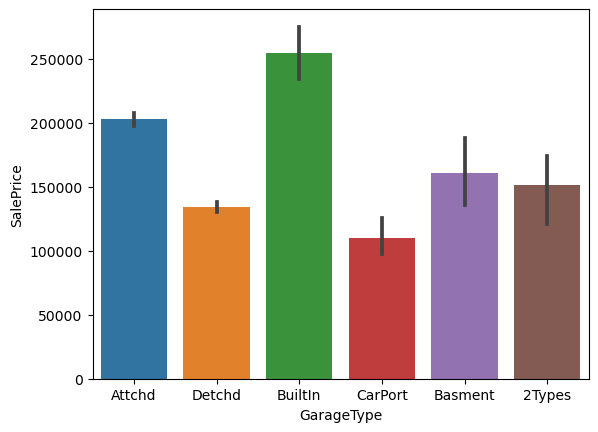

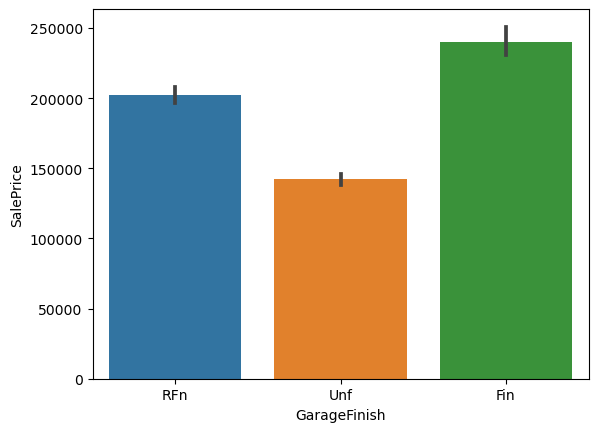

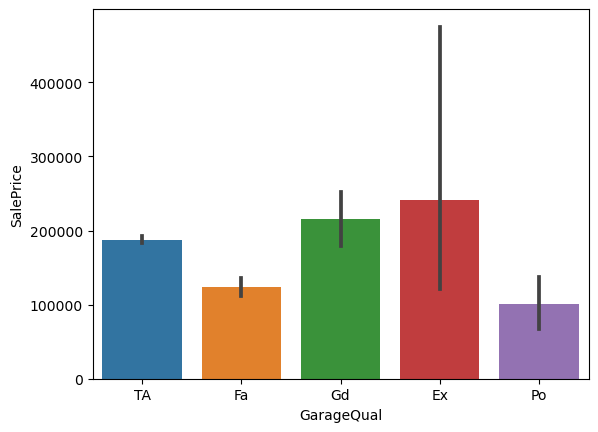

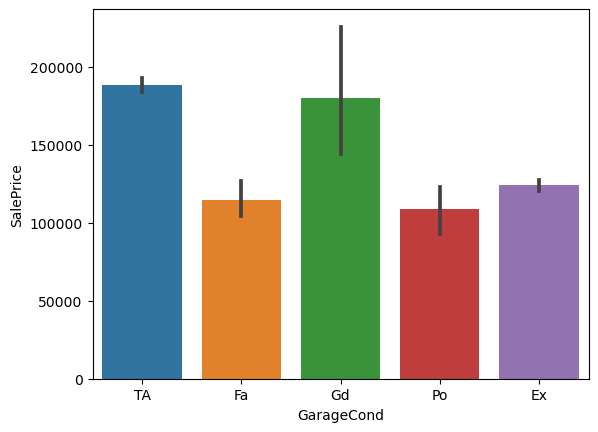

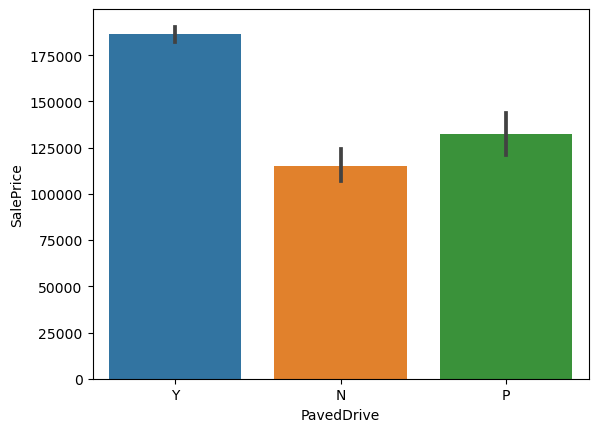

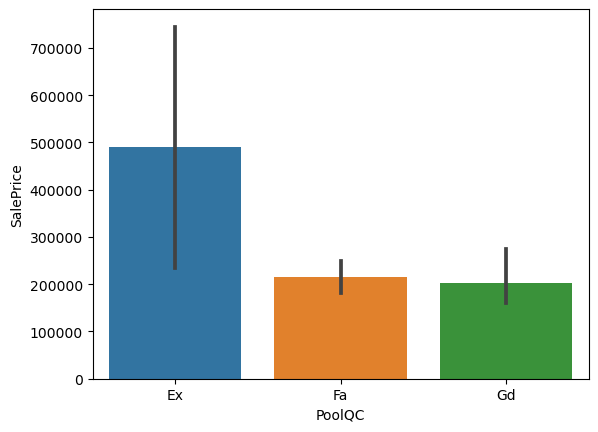

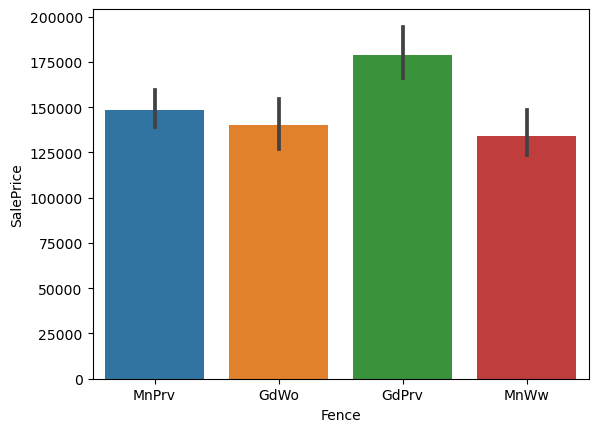

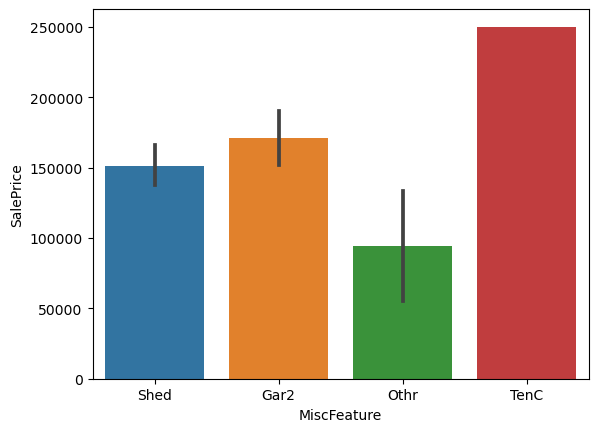

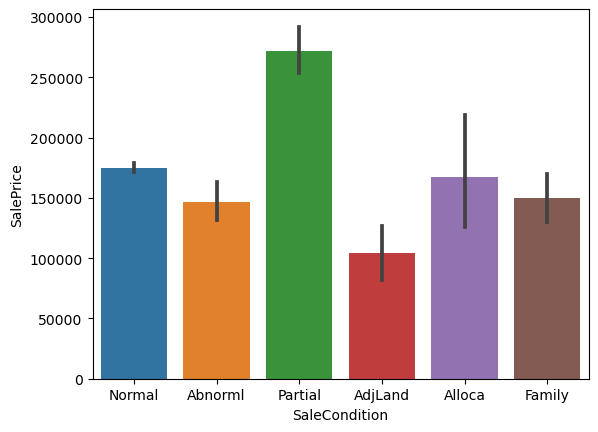

In [17]:
#train_house.plot(kind='bar',x=train_house['MoSold'].unique(),y=train_house['SalePrice'].median())
for feature in categorical_features:
    sns.barplot(x=feature,y='SalePrice',data=train_house)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


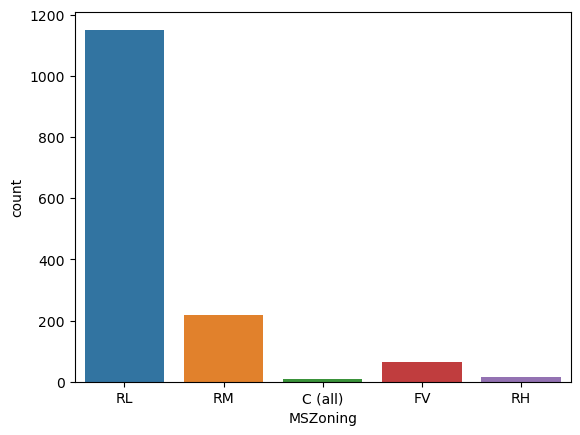

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


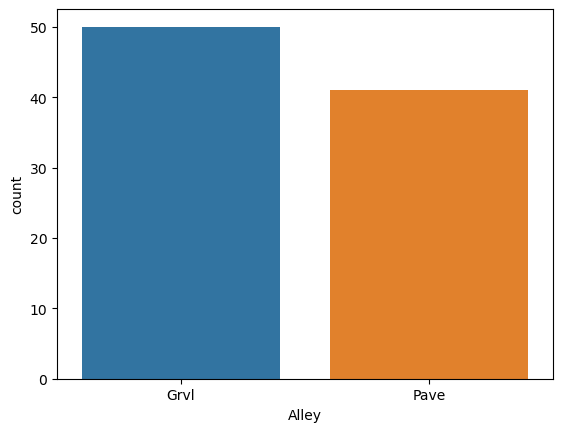

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


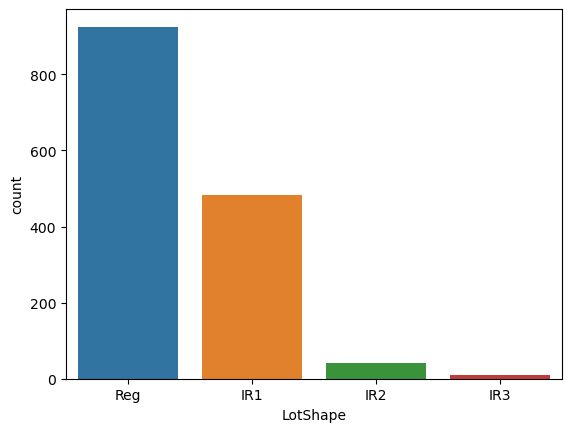

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


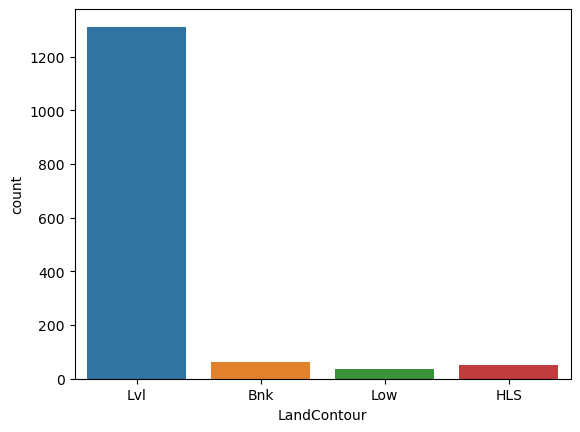

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


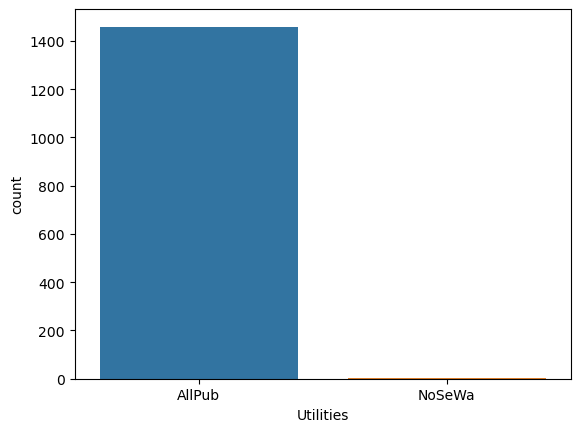

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


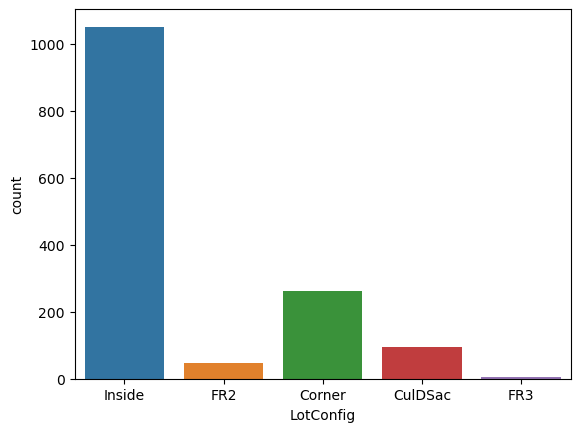

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


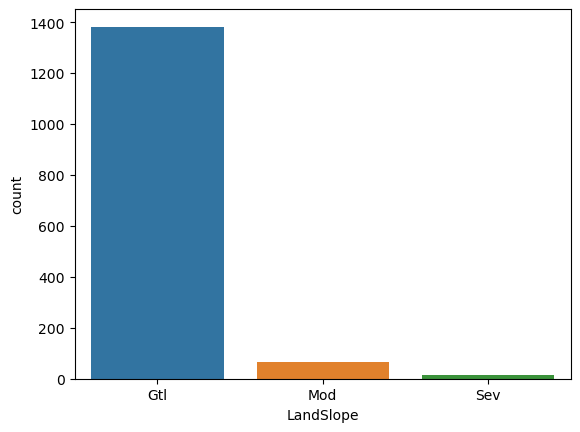

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


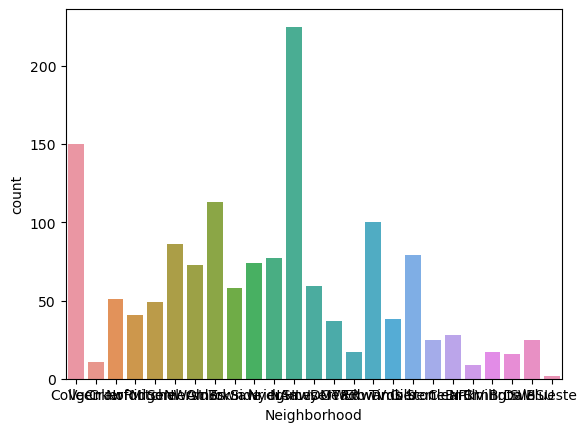

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


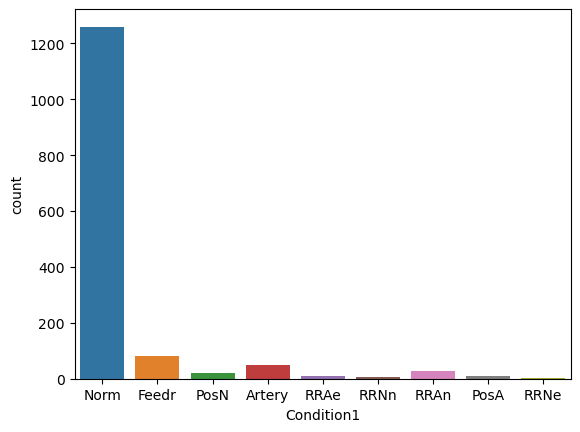

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


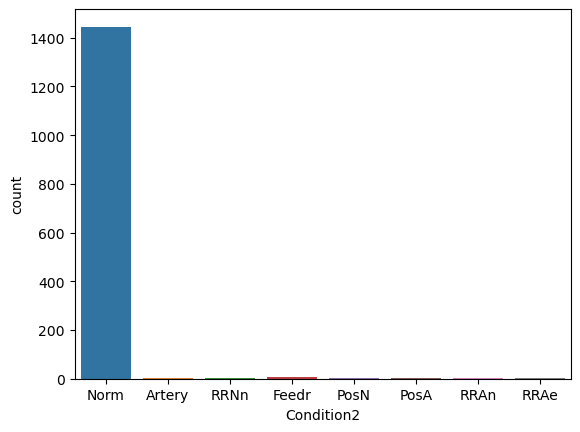

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


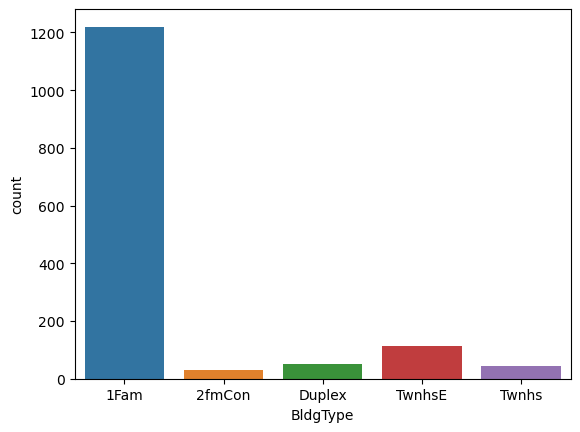

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


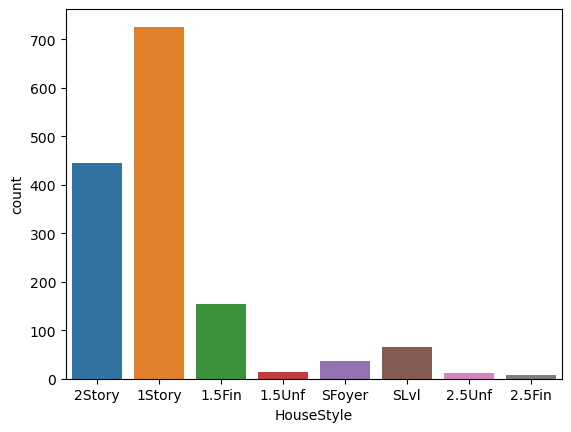

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


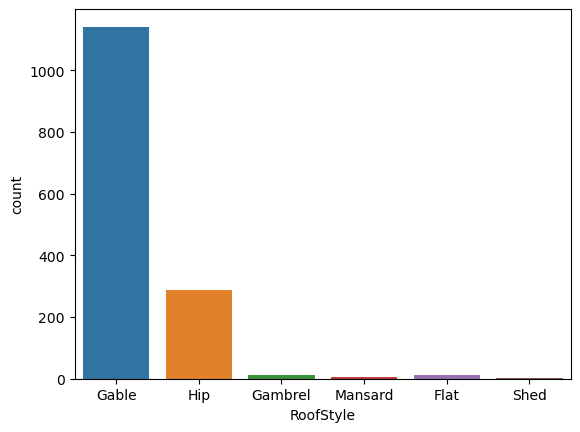

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


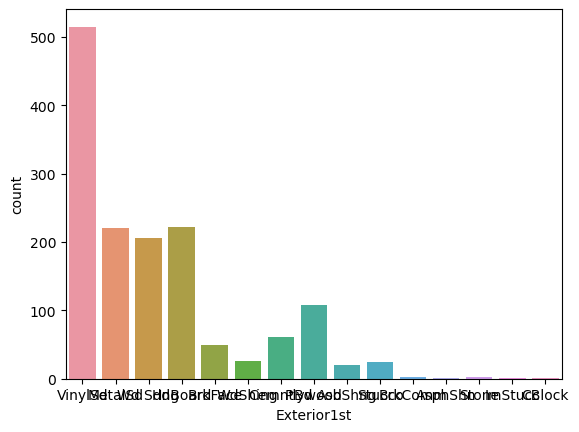

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


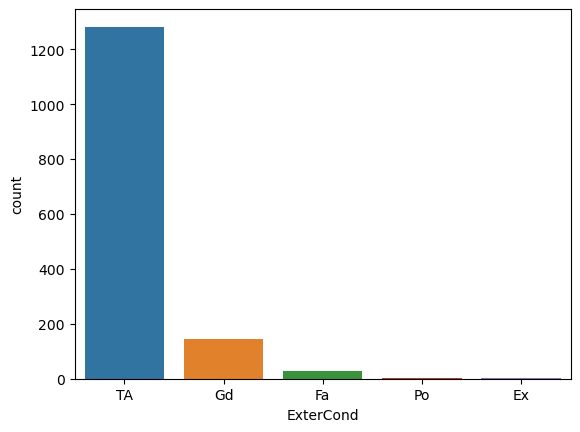

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


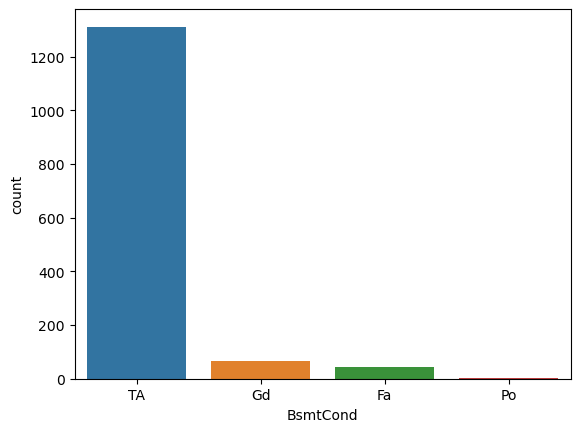

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


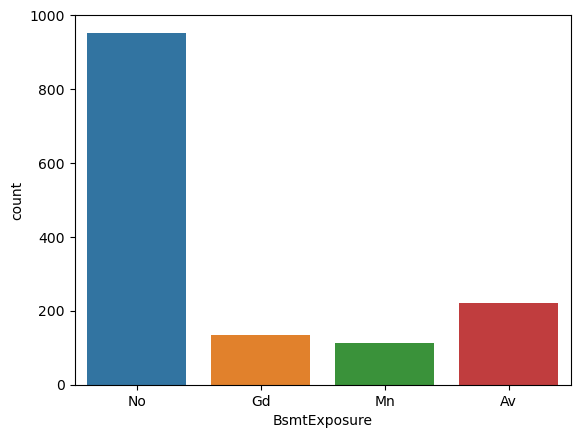

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


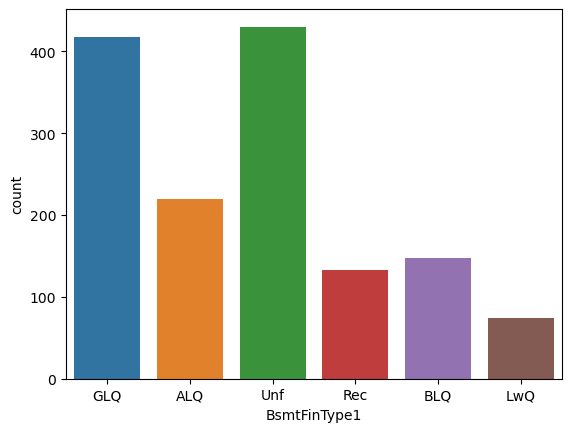

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


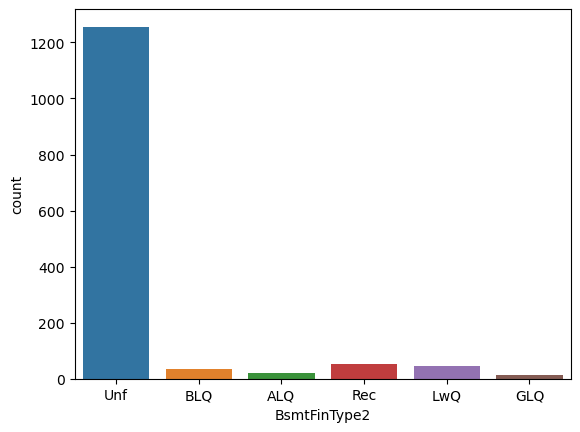

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


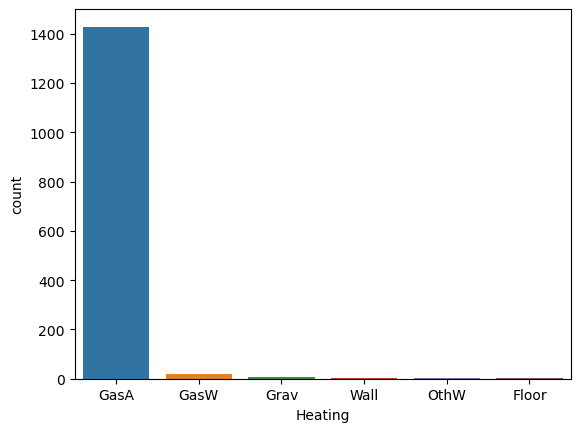

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


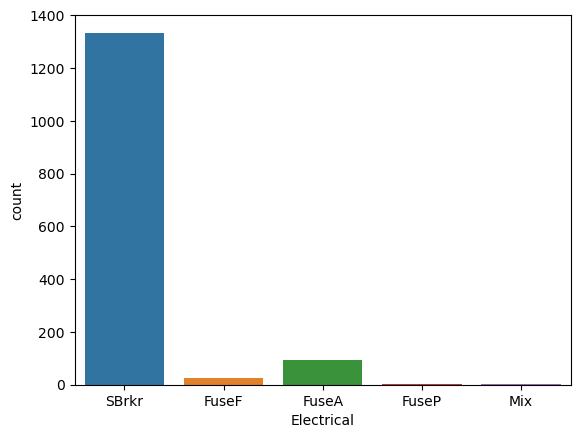

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


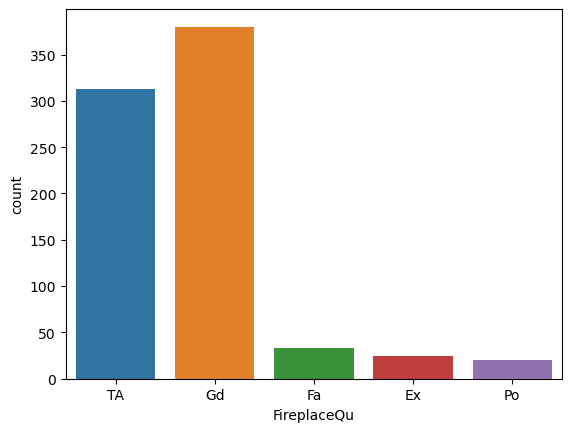

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


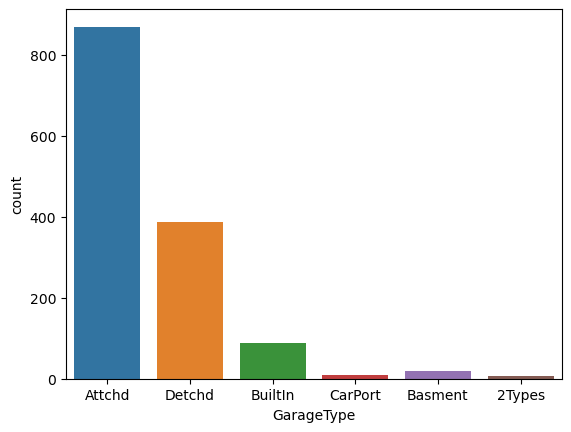

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


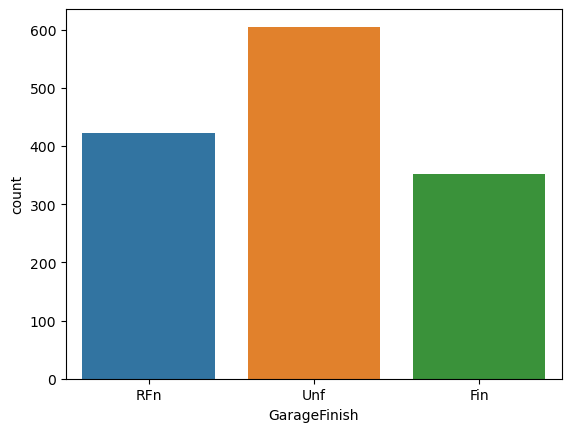

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


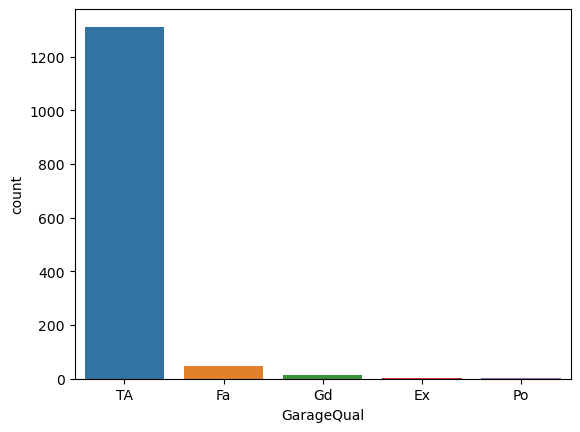

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


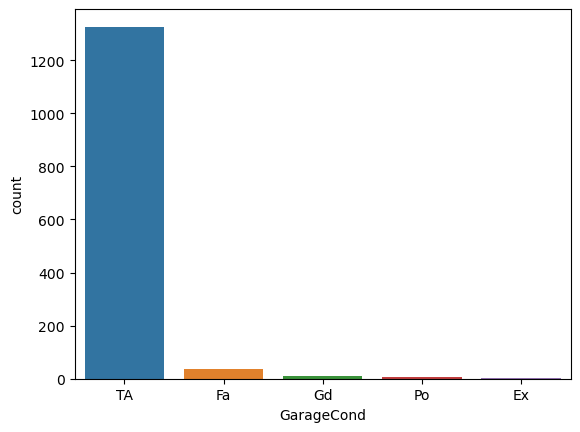

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


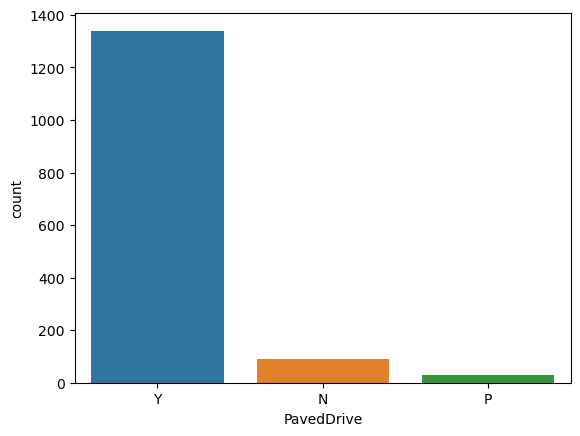

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


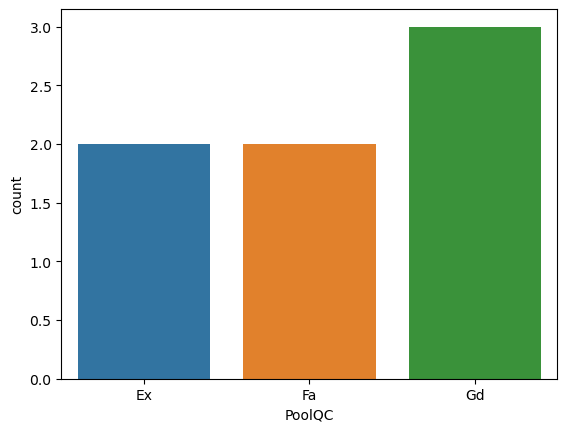

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


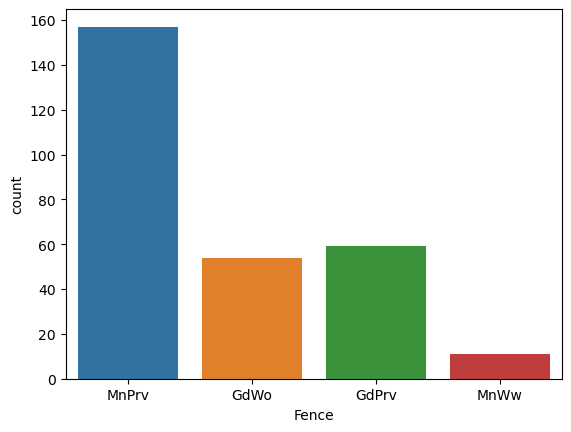

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


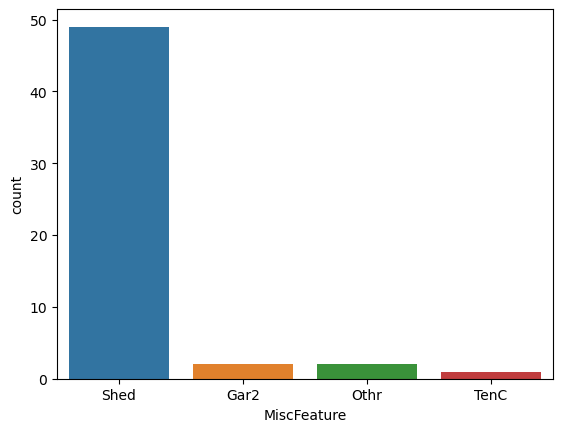

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


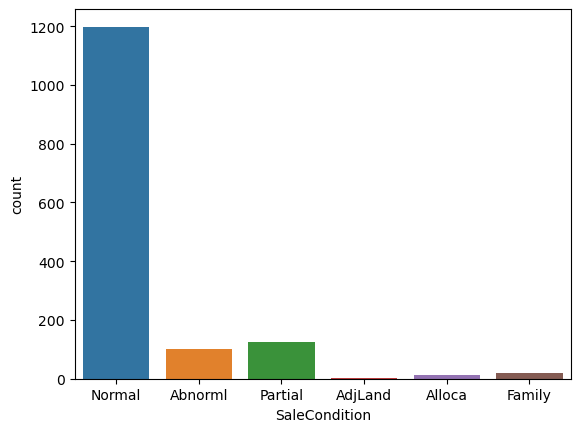

In [18]:
for feature in categorical_features:
    sns.countplot(feature,data=train_house)
    plt.show()

In [19]:
train_house.groupby('SaleCondition')['SalePrice'].sum()

SaleCondition
Abnorml     14799189
AdjLand       416500
Alloca       2008529
Family       2992000
Normal     209892259
Partial     34036469
Name: SalePrice, dtype: int64

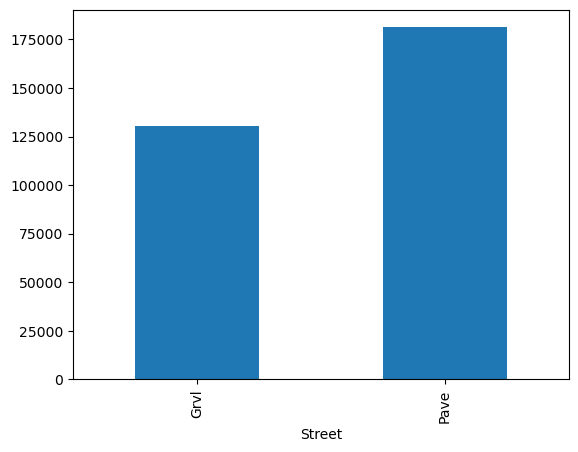

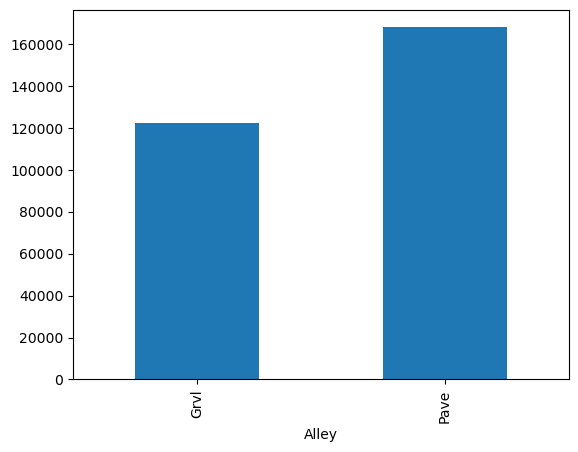

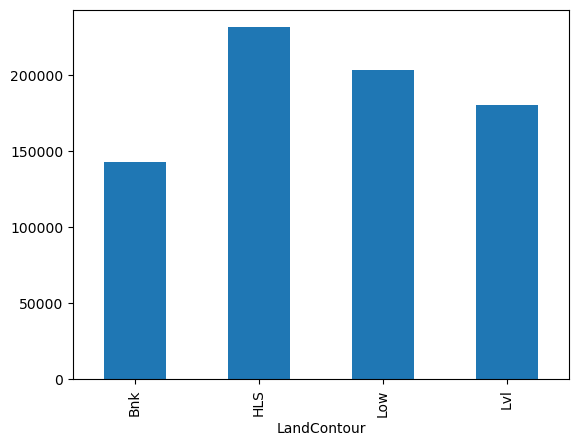

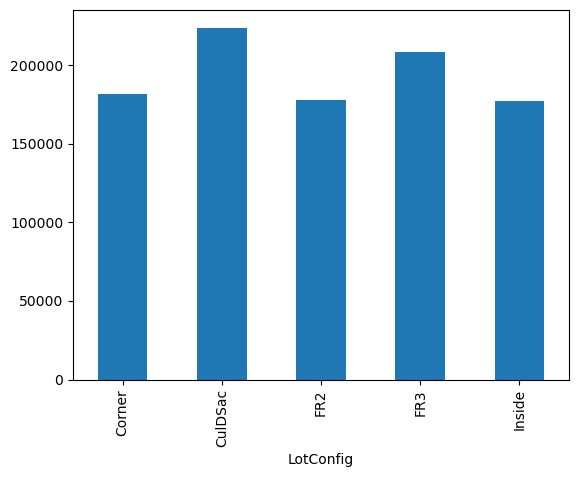

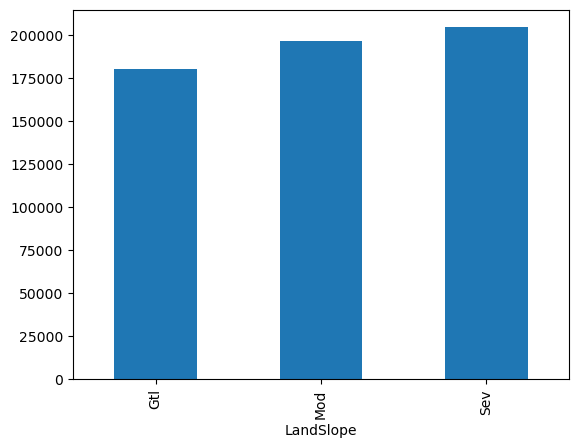

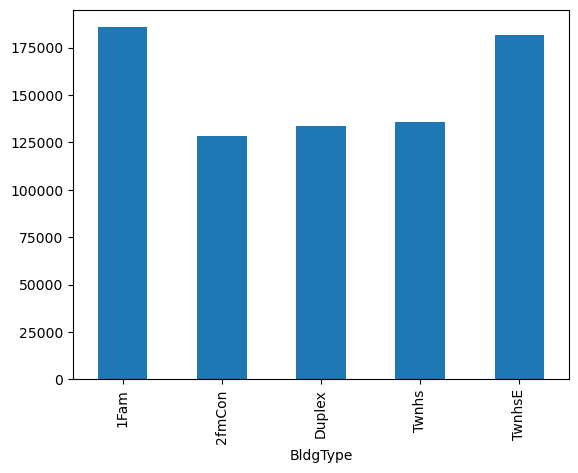

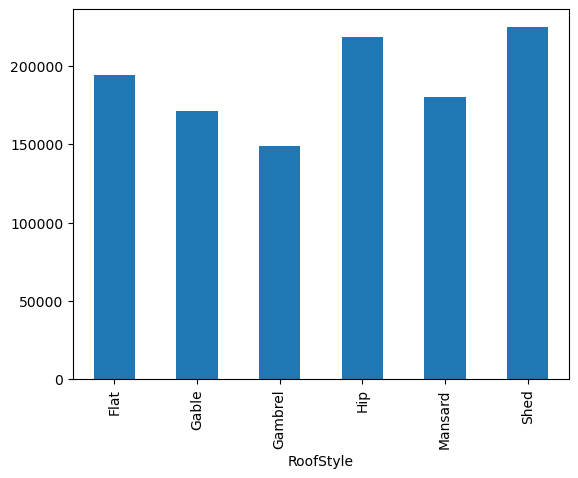

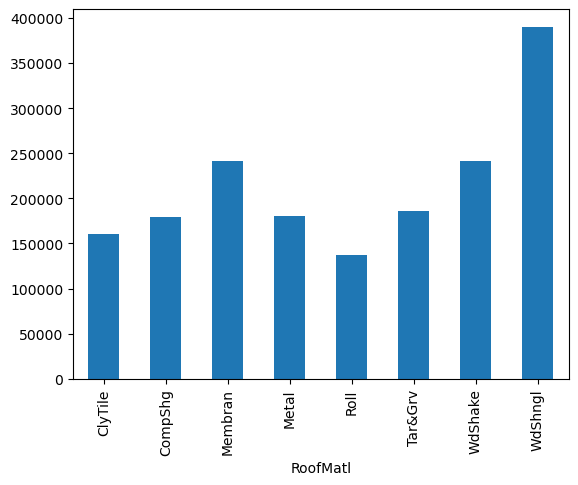

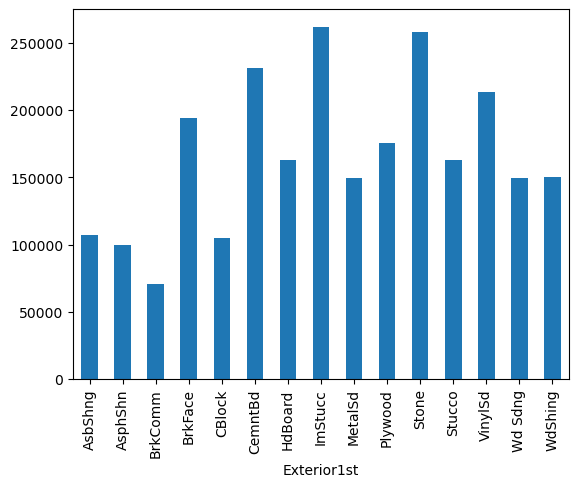

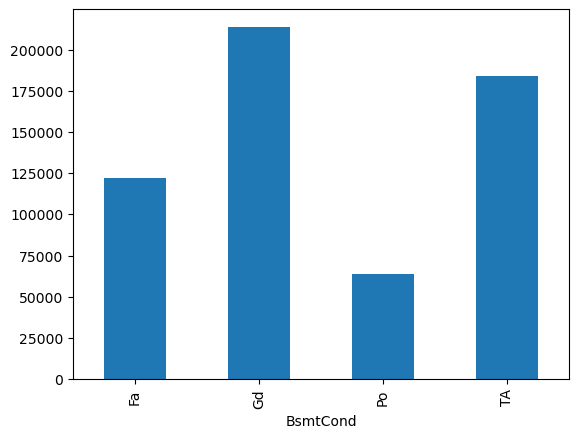

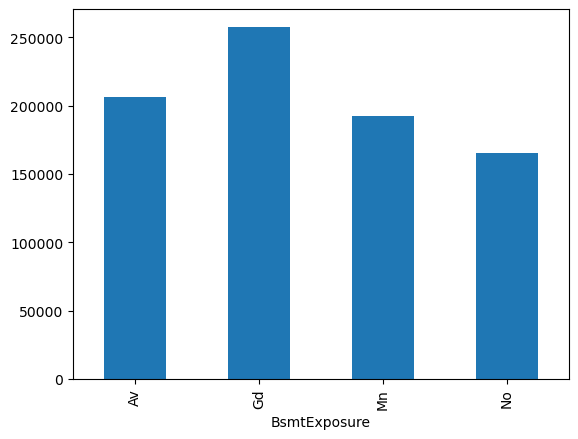

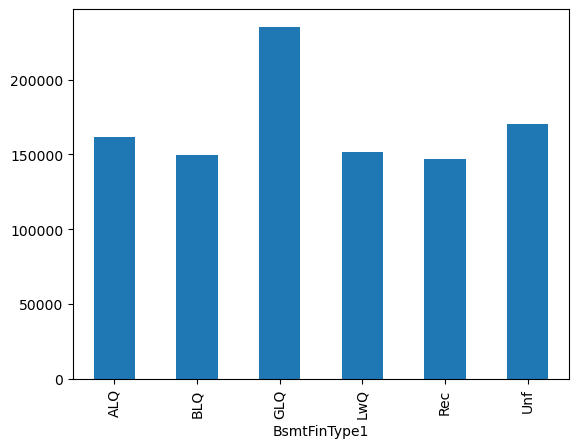

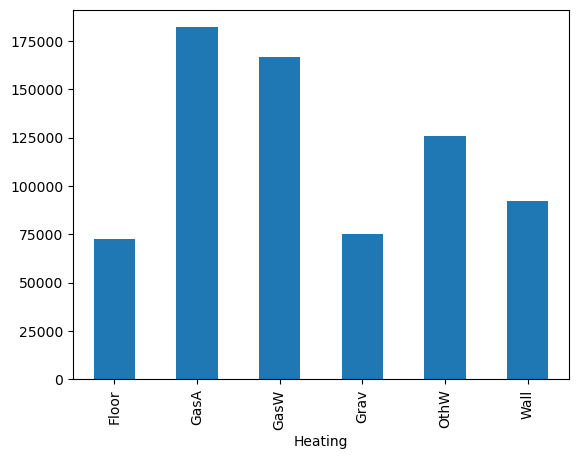

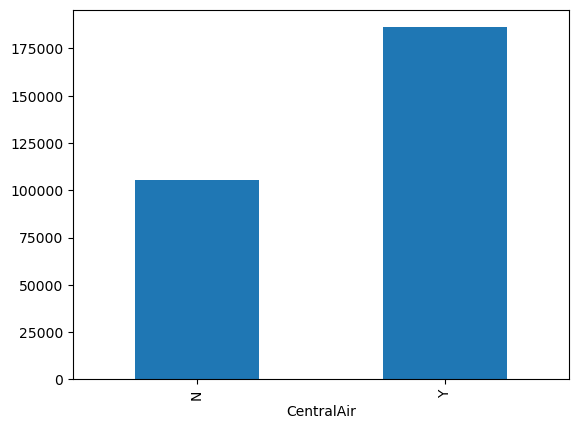

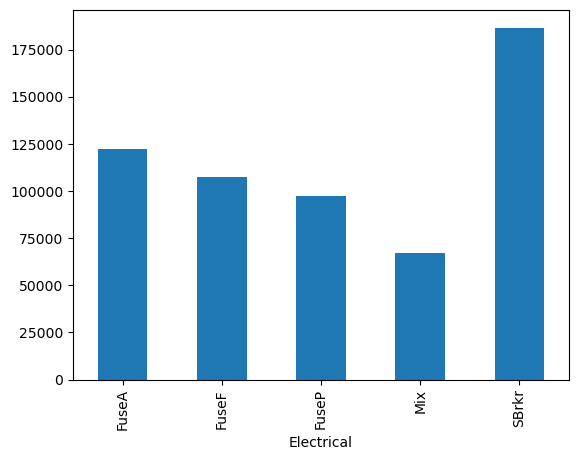

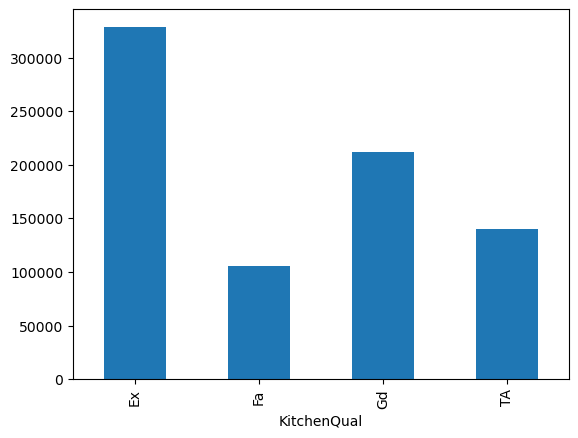

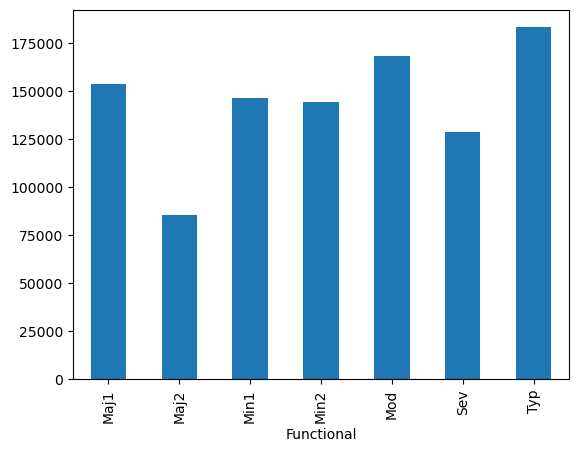

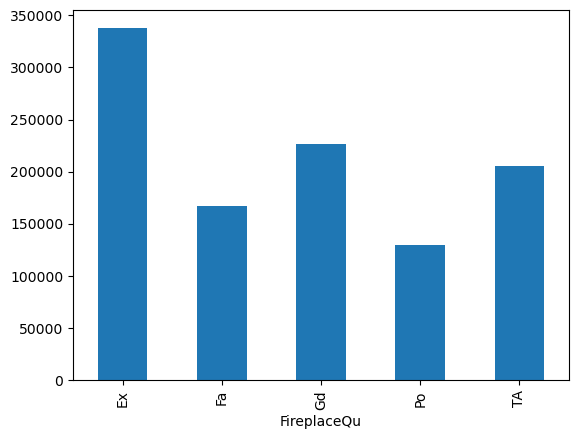

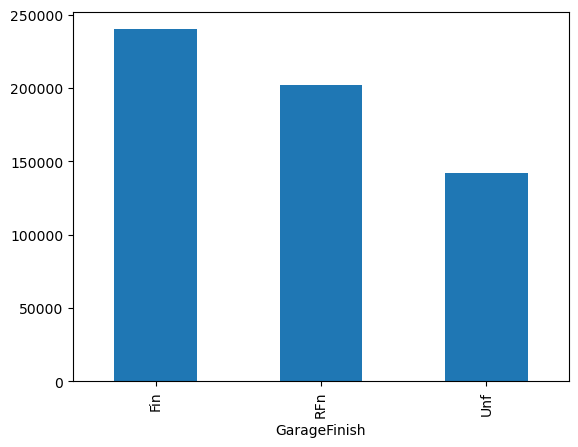

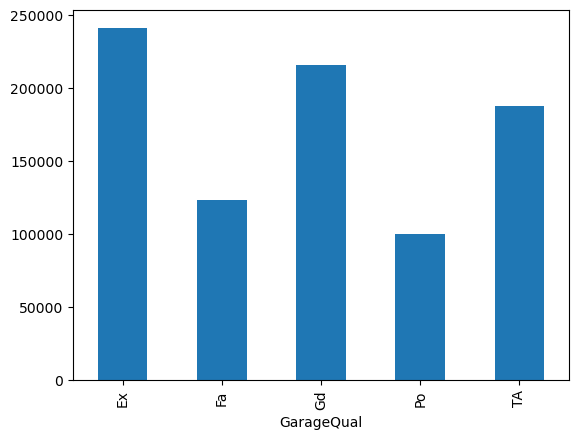

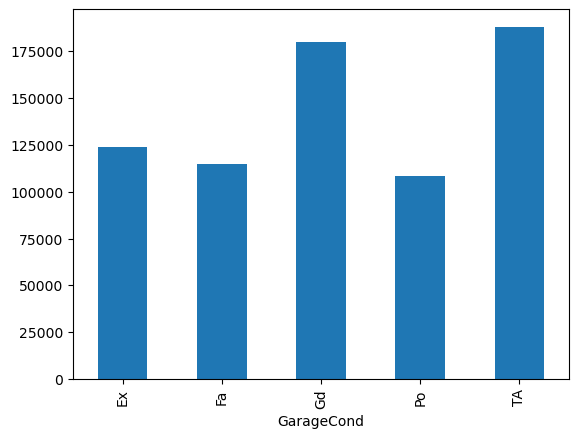

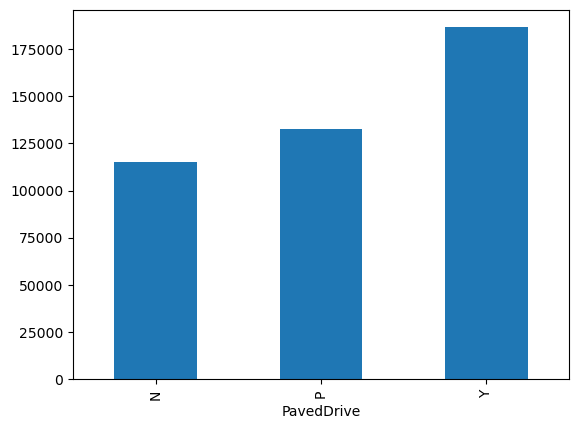

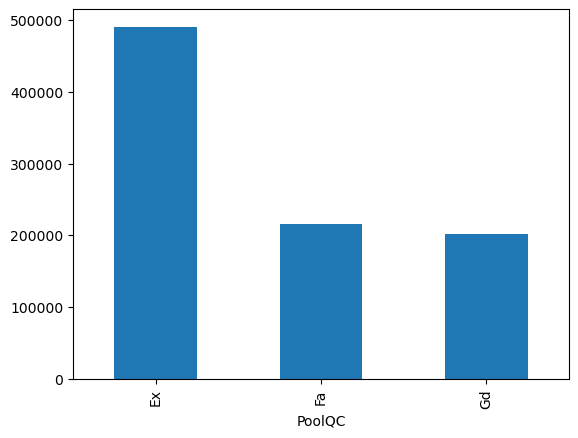

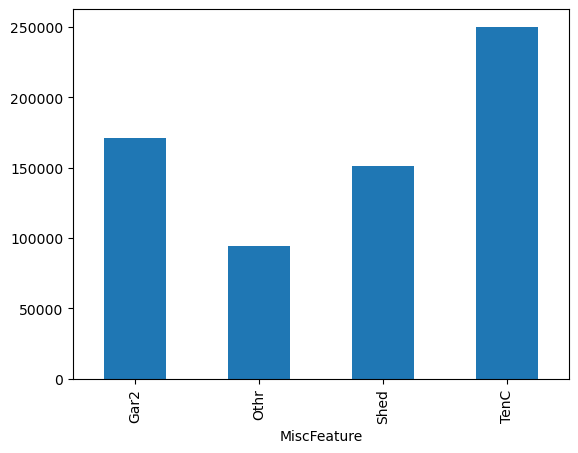

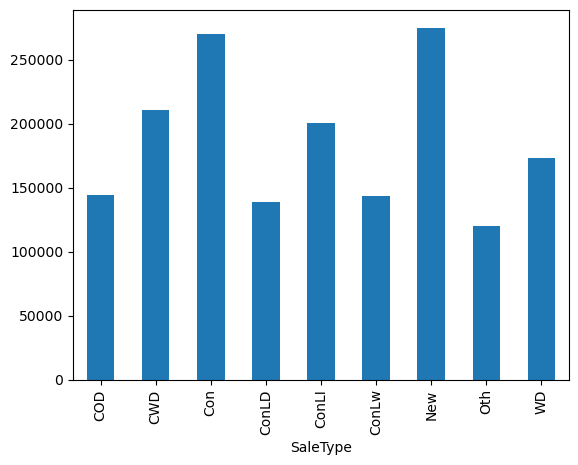

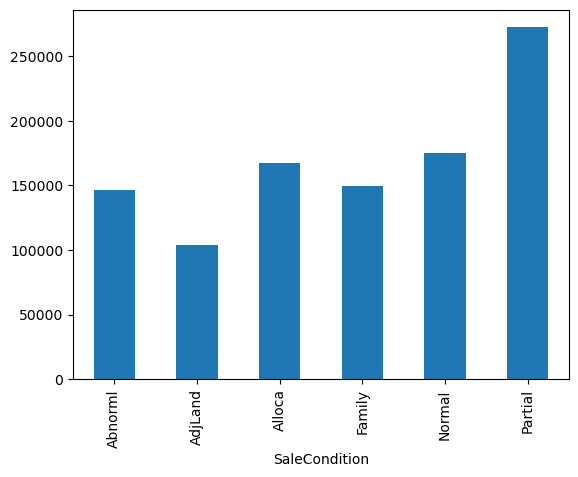

In [20]:
for feature in categorical_features:
    train_house.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.show()

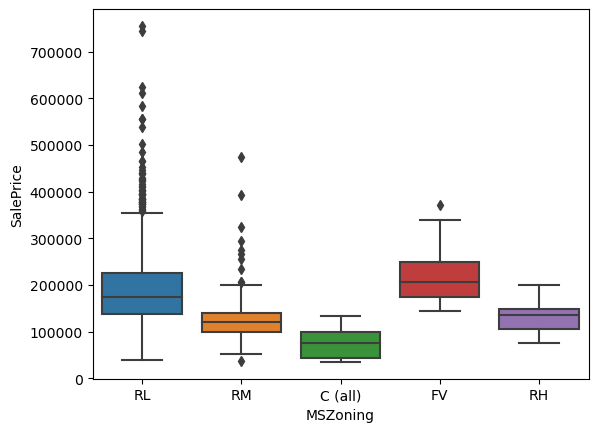

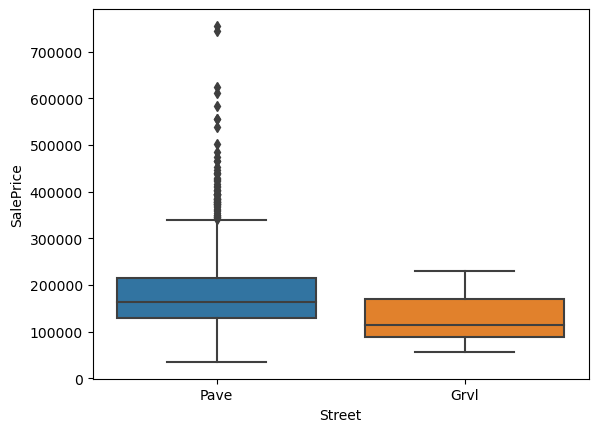

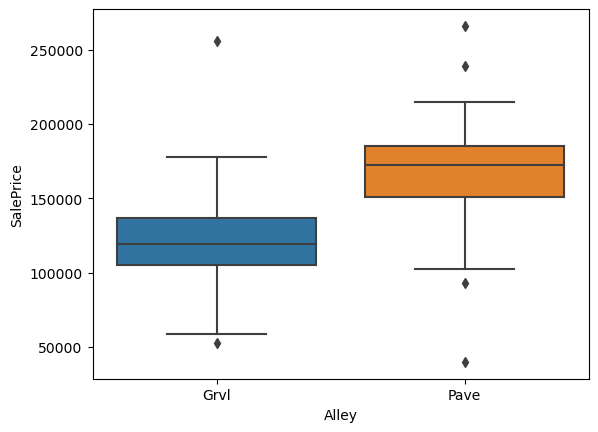

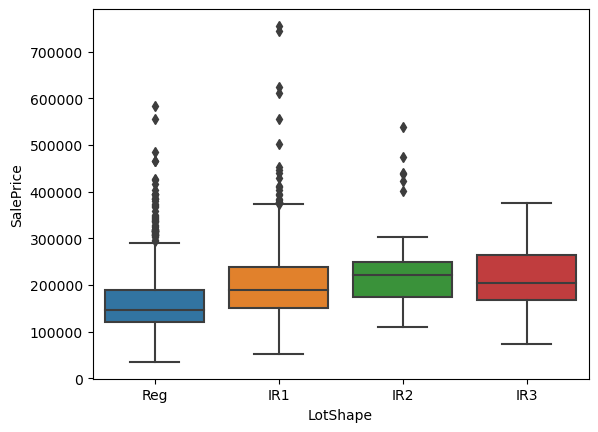

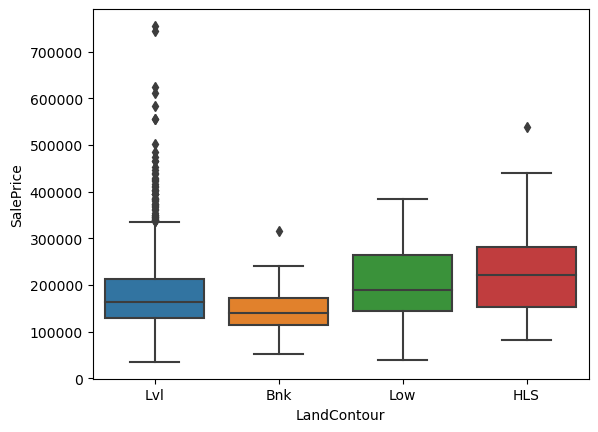

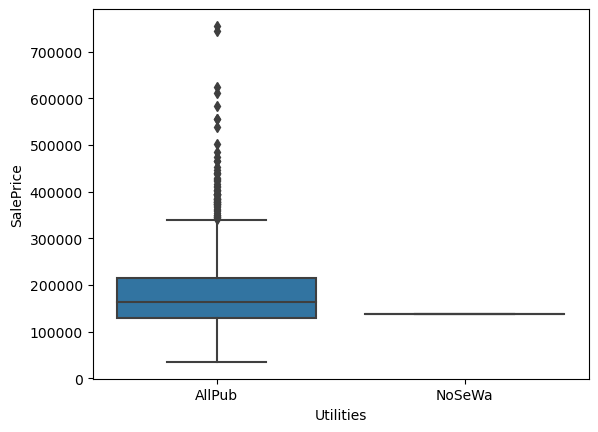

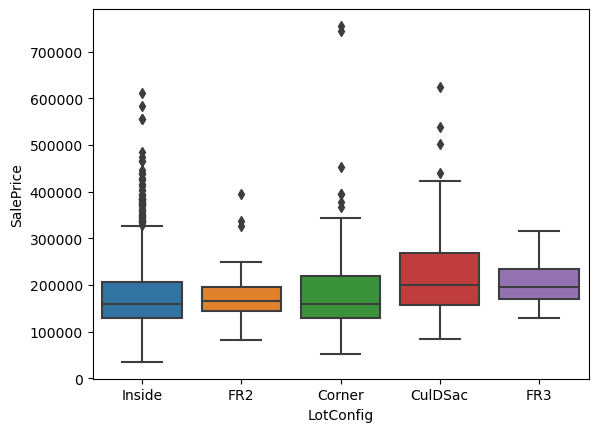

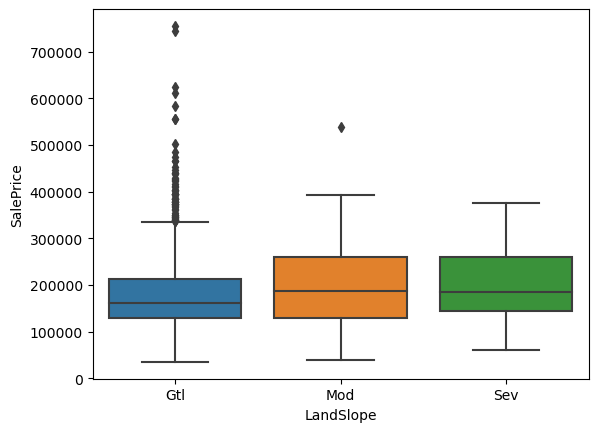

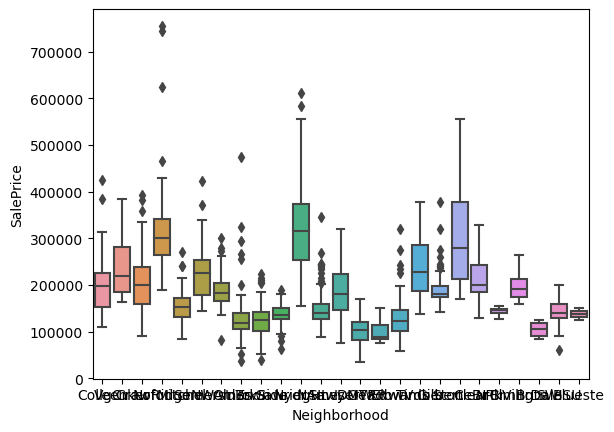

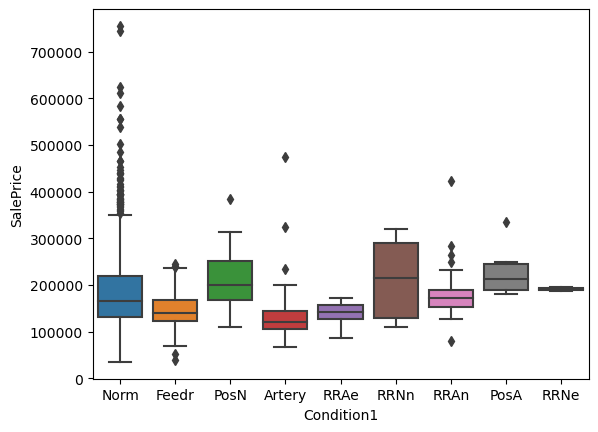

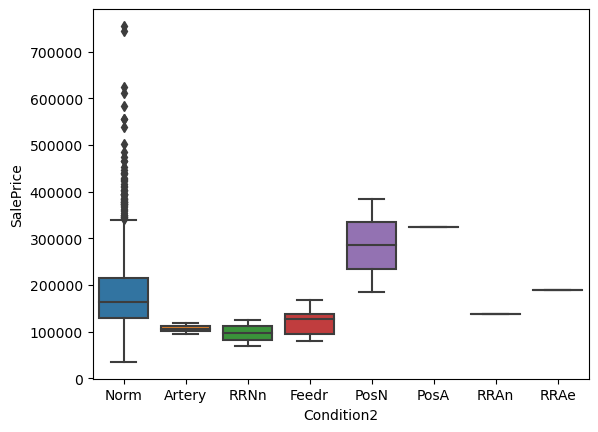

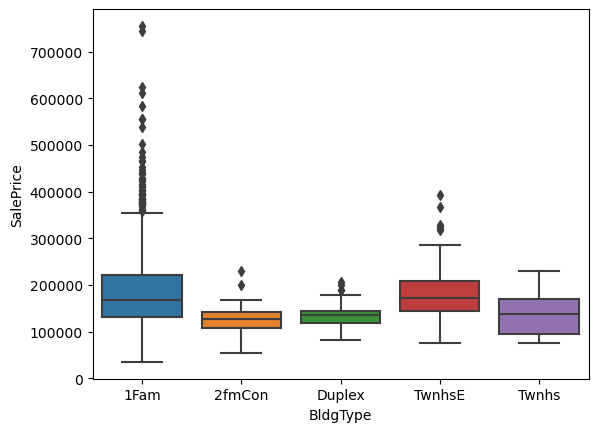

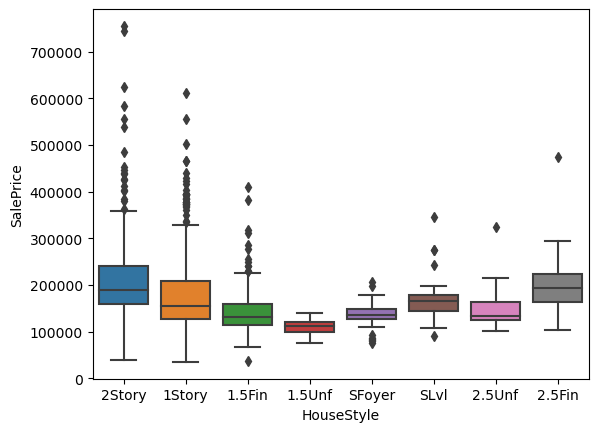

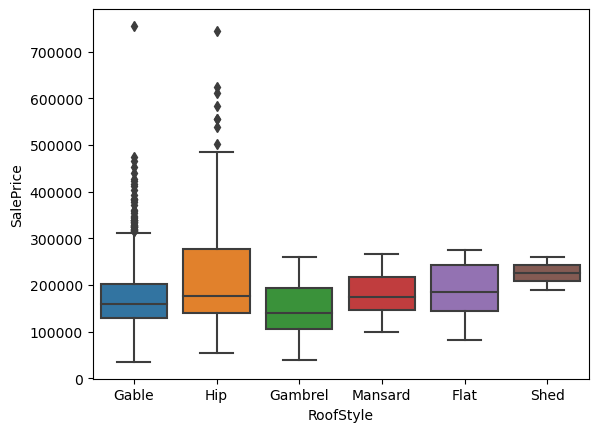

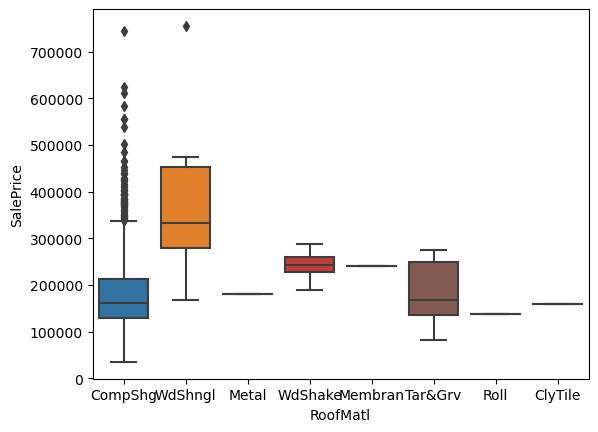

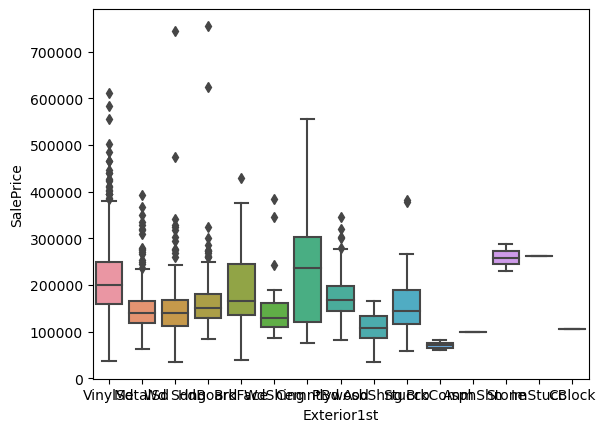

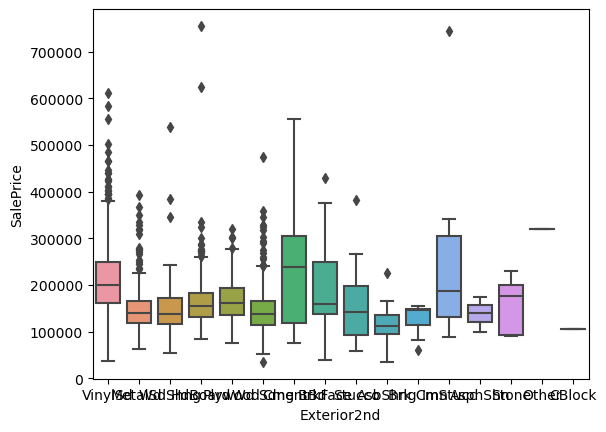

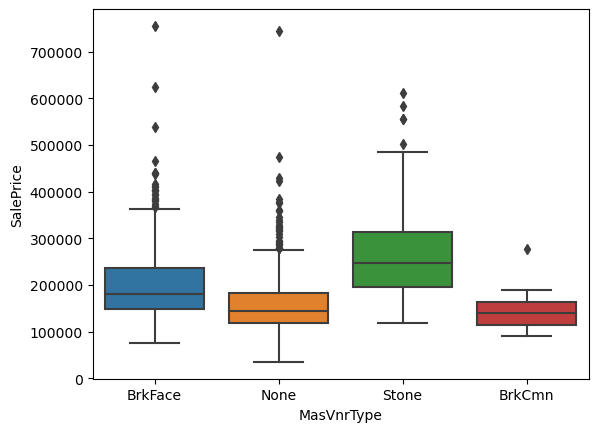

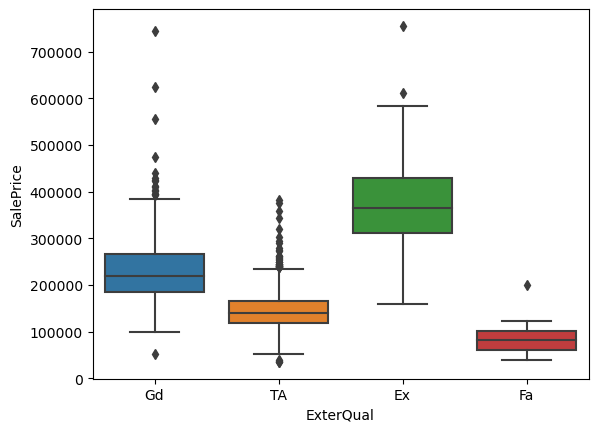

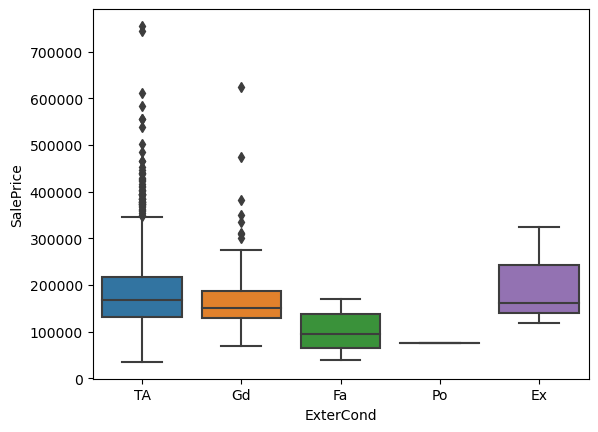

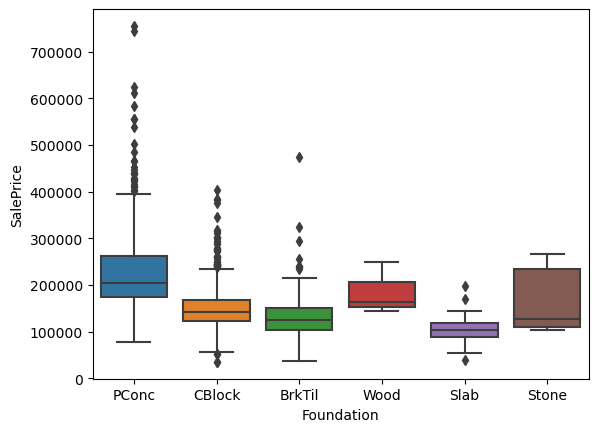

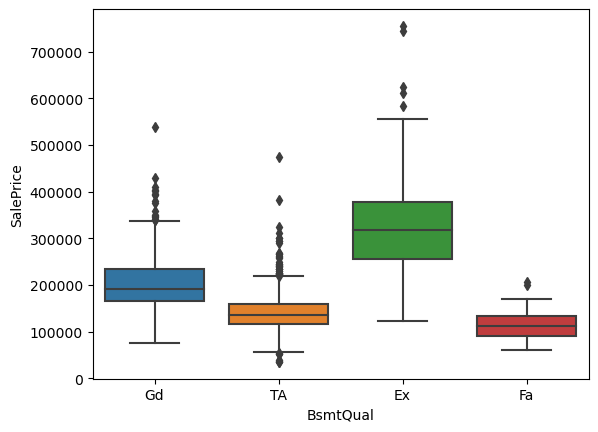

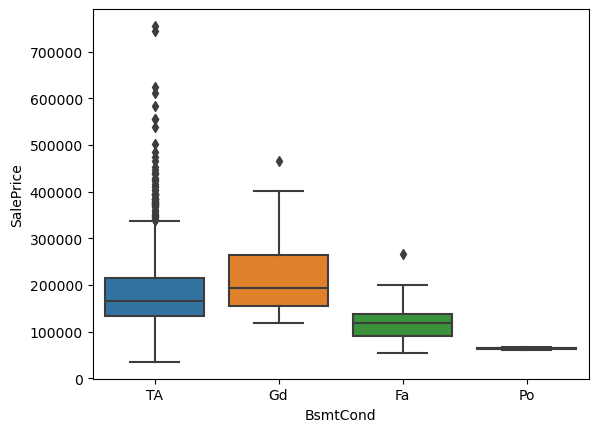

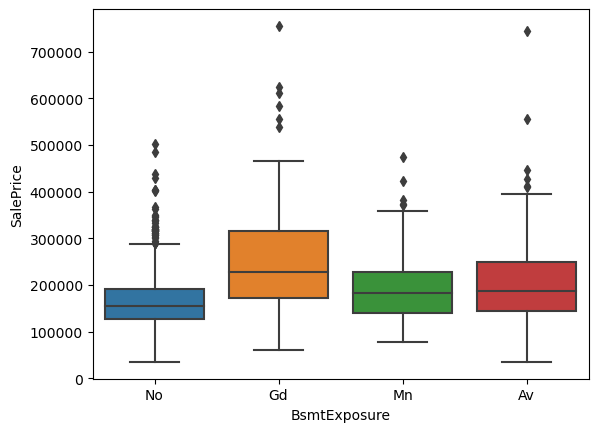

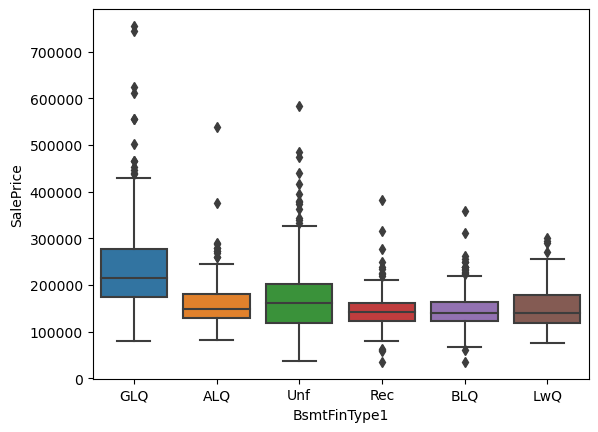

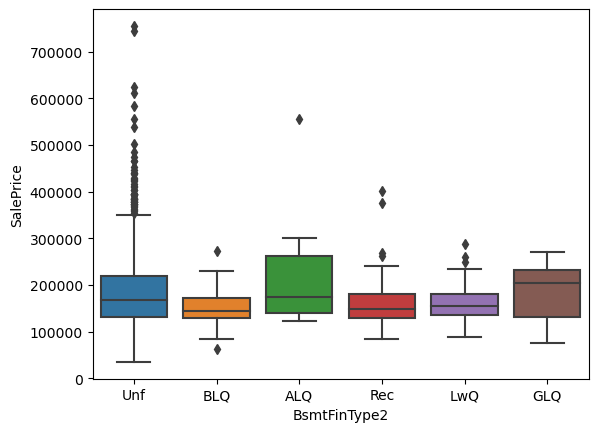

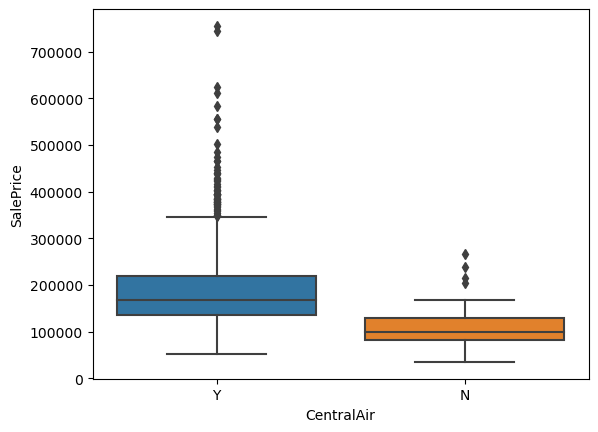

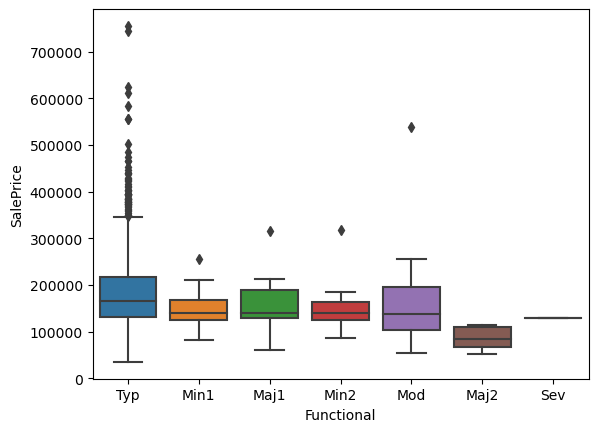

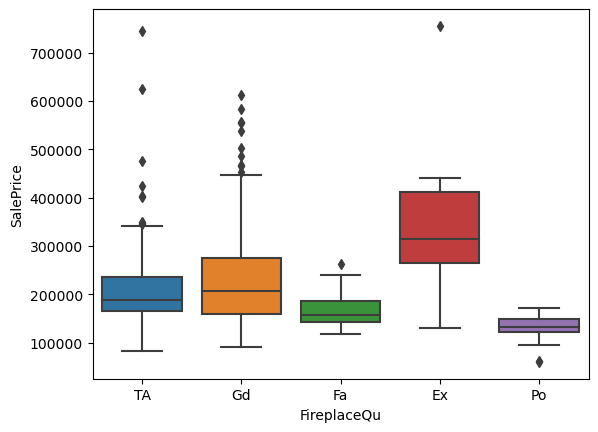

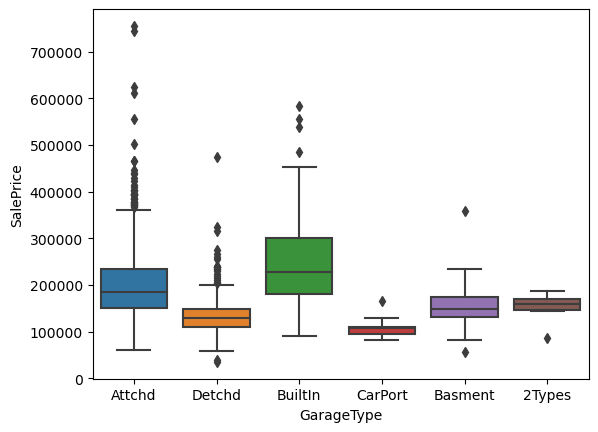

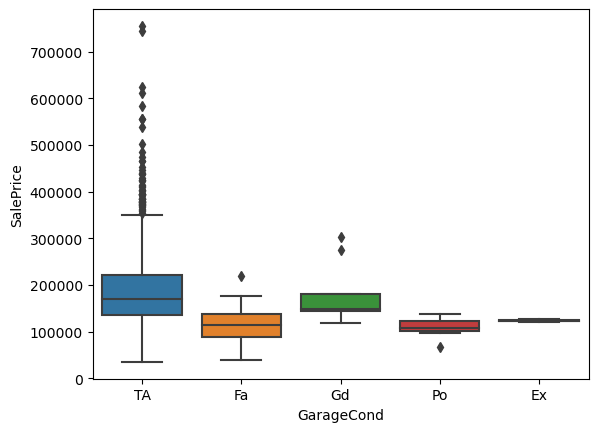

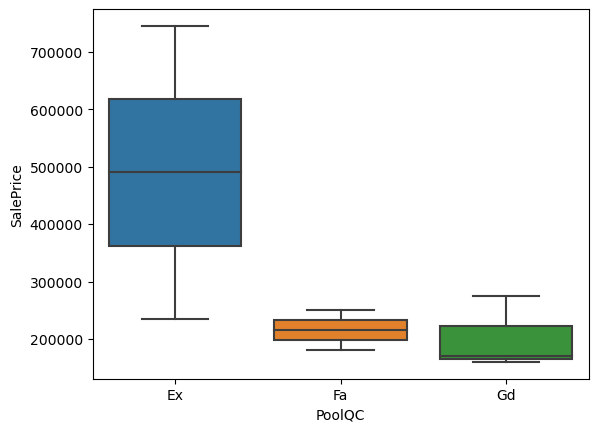

In [21]:
for feature in categorical_features:
    sns.boxplot(x=feature,y='SalePrice',data=train_house)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

## Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

In [22]:
dataset = train_house.copy()

In [23]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [24]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [25]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [26]:

## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [27]:

## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [28]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

Since the numerical variables are skewed we will perform log normal distribution



In [29]:
dataset.head()


MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub    Inside  ...     Missing       0      2   2008   
1         Lvl    AllPub       FR2  ...     Missing       0      5   2007   
2         Lvl    AllPub    Inside  ...     Missing       0      9   2008   
3         Lvl    AllPub    Corner  ...     Missing       0      2   2006   
4         Lvl    AllPub       FR2  ...     Missing       0     12   2008   

  SaleType SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  \
0       WD        Normal     208500               0              0   
1       WD        Normal     181500               0              0   
2       WD        Normal     223500               0              0   
3       WD       Abnorml     140000               0              0   
4       WD        Normal     250000               0              0   

   GarageYrBltnan  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 83 columns]

In [30]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [31]:
dataset.head()


MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub    Inside  ...     Missing       0      2   2008   
1         Lvl    AllPub       FR2  ...     Missing       0      5   2007   
2         Lvl    AllPub    Inside  ...     Missing       0      9   2008   
3         Lvl    AllPub    Corner  ...     Missing       0      2   2006   
4         Lvl    AllPub       FR2  ...     Missing       0     12   2008   

  SaleType SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  \
0       WD        Normal  12.247694               0              0   
1       WD        Normal  12.109011               0              0   
2       WD        Normal  12.317167               0              0   
3       WD       Abnorml  11.849398               0              0   
4       WD        Normal  12.429216               0              0   

   GarageYrBltnan  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 83 columns]

# Handling Rare Categorical Feature
We will remove categorical variables that are present less than 1% of the observations



In [32]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']


In [33]:
categorical_features


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    

In [35]:
dataset.head(100)


MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0           60       RL     4.174387  9.041922   Pave  Missing      Reg   
1           20       RL     4.382027  9.169518   Pave  Missing      Reg   
2           60       RL     4.219508  9.328123   Pave  Missing      IR1   
3           70       RL     4.094345  9.164296   Pave  Missing      IR1   
4           60       RL     4.430817  9.565214   Pave  Missing      IR1   
..         ...      ...          ...       ...    ...      ...      ...   
95          60       RL     4.234107  9.186560   Pave  Missing      IR2   
96          20       RL     4.356709  9.236398   Pave  Missing      IR1   
97          20       RL     4.290459  9.298443   Pave  Missing      Reg   
98          30       RL     4.442651  9.270965   Pave  Missing      Reg   
99          20       RL     4.343805  9.139918   Pave  Missing      IR1   

   LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0          Lvl    AllPub    Inside  ...     Missing       0      2   2008   
1          Lvl    AllPub       FR2  ...     Missing       0      5   2007   
2          Lvl    AllPub    Inside  ...     Missing       0      9   2008   
3          Lvl    AllPub    Corner  ...     Missing       0      2   2006   
4          Lvl    AllPub       FR2  ...     Missing       0     12   2008   
..         ...       ...       ...  ...         ...     ...    ...    ...   
95         Lvl    AllPub    Corner  ...        Shed     480      4   2009   
96         Lvl    AllPub    Inside  ...     Missing       0      8   2006   
97         HLS    AllPub    Inside  ...     Missing       0      5   2007   
98         Lvl    AllPub    Corner  ...        Shed     400      5   2010   
99         Lvl    AllPub    Inside  ...        Shed     400      1   2010   

   SaleType SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  \
0        WD        Normal  12.247694               0              0   
1        WD        Normal  12.109011               0              0   
2        WD        Normal  12.317167               0              0   
3        WD       Abnorml  11.849398               0              0   
4        WD        Normal  12.429216               0              0   
..      ...           ...        ...             ...            ...   
95       WD        Normal  12.128111               1              0   
96       WD        Normal  12.273731               0              0   
97       WD        Normal  11.458997               0              0   
98      COD       Abnorml  11.326596               0              0   
99       WD        Normal  11.767180               0              0   

    GarageYrBltnan  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
95               0  
96               0  
97               0  
98               0  
99               1  

[100 rows x 83 columns]

In [36]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [37]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

# Feature Scaling


In [38]:

feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [39]:
scaler.transform(dataset[feature_scale])


array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [41]:
data.head()


SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  ...  Fence  MiscFeature  MiscVal  \
0  0.000000     0.333333        1.0  ...    1.0          1.0      0.0   
1  0.000000     0.333333        1.0  ...    1.0          1.0      0.0   
2  0.333333     0.333333        1.0  ...    1.0          1.0      0.0   
3  0.333333     0.333333        1.0  ...    1.0          1.0      0.0   
4  0.333333     0.333333        1.0  ...    1.0          1.0      0.0   

     MoSold  YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0  0.090909    0.50  0.666667           0.75             0.0            0.0   
1  0.363636    0.25  0.666667           0.75             0.0            0.0   
2  0.727273    0.50  0.666667           0.75             0.0            0.0   
3  0.090909    0.00  0.666667           0.00             0.0            0.0   
4  1.000000    0.50  0.666667           0.75             0.0            0.0   

   GarageYrBltnan  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 83 columns]

# Feature Selection

In [42]:
dataset=data.copy()


In [43]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]

In [44]:

## drop dependent feature from dataset
X_train=dataset.drop(['SalePrice'],axis=1)

In [45]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [46]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [47]:
feature_sel_model.get_support()


array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [48]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 21
features with coefficients shrank to zero: 61


In [49]:
selected_feat


Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')

In [50]:
X_train=X_train[selected_feat]


In [51]:
X_train.head()

MSSubClass  MSZoning  Neighborhood  OverallQual  YearRemodAdd  RoofStyle  \
0    0.235294      0.75      0.636364     0.666667      0.098361        0.0   
1    0.000000      0.75      0.500000     0.555556      0.524590        0.0   
2    0.235294      0.75      0.636364     0.666667      0.114754        0.0   
3    0.294118      0.75      0.727273     0.666667      0.606557        0.0   
4    0.235294      0.75      1.000000     0.777778      0.147541        0.0   

   BsmtQual  BsmtExposure  HeatingQC  CentralAir  ...  GrLivArea  \
0      0.75          0.25       1.00         1.0  ...   0.577712   
1      0.75          1.00       1.00         1.0  ...   0.470245   
2      0.75          0.50       1.00         1.0  ...   0.593095   
3      0.50          0.25       0.75         1.0  ...   0.579157   
4      0.75          0.75       1.00         1.0  ...   0.666523   

   BsmtFullBath  KitchenQual  Fireplaces  FireplaceQu  GarageType  \
0      0.333333     0.666667    0.000000          0.2         0.8   
1      0.000000     0.333333    0.333333          0.6         0.8   
2      0.333333     0.666667    0.333333          0.6         0.8   
3      0.333333     0.666667    0.333333          0.8         0.4   
4      0.333333     0.666667    0.333333          0.6         0.8   

   GarageFinish  GarageCars  PavedDrive  SaleCondition  
0      0.666667        0.50         1.0           0.75  
1      0.666667        0.50         1.0           0.75  
2      0.666667        0.50         1.0           0.75  
3      0.333333        0.75         1.0           0.00  
4      0.666667        0.75         1.0           0.75  

[5 rows x 21 columns]